**PYTHON - PADHAI**

**PART 2**



#VISUALISATION - Continued




In [ ]:
#plt.style.available

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use( 'seaborn-white')

import seaborn as sns
sns.set_theme(color_codes=True)

##PLOTTING THE COMPOSITION OF DATA

###Static Composition

single snapshot of data, we look at the data once, data does't change.
we look at the composition once

####Pie Chart

In [ ]:
p = sns.load_dataset('penguins')
p.head()

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]

In [ ]:
#plotting static composition of penguin species

species = p.groupby('species')['species'].count()

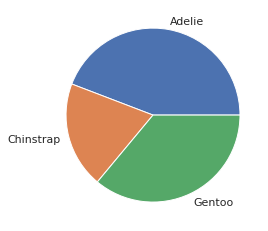

In [ ]:
plt.pie(species, labels=species.index);
plt.show()

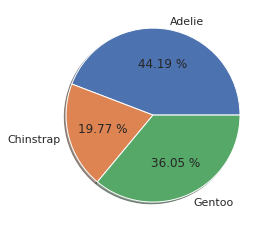

In [ ]:
plt.pie(species, labels=species.index, shadow=True, autopct='%0.2f %%' );

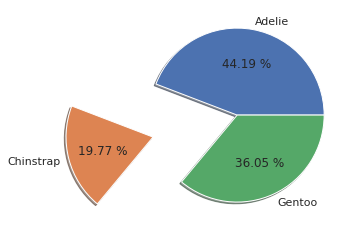

In [ ]:
plt.pie(species, labels=species.index, shadow=True, autopct='%0.2f %%' , explode=[0,1,0]);

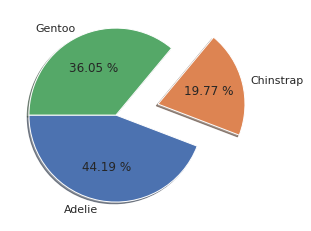

In [ ]:
plt.pie(species, labels=species.index, shadow=True, autopct='%05.2f %%' , explode=[0,0.5,0], startangle=180);

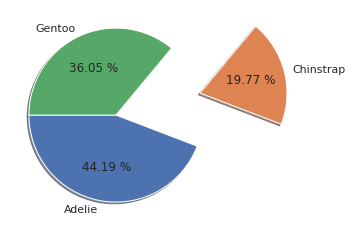

In [ ]:
plt.pie(species, labels=species.index, shadow=True, autopct='%0.2f %%' , explode=[0,1,0], startangle=180,);

####Donut Chart

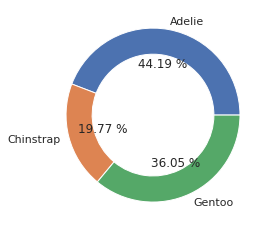

In [ ]:
plt.pie(species, labels=species.index, autopct='%0.2f %%', wedgeprops=dict(width=0.3));

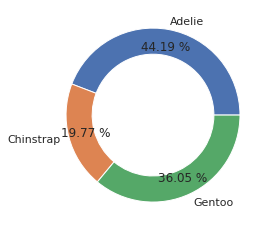

In [ ]:
plt.pie(species, labels=species.index, shadow=False, autopct='%0.2f %%' , pctdistance=0.8,wedgeprops=dict(width=0.3));

In [ ]:
c = pd.crosstab(p.island, p.species)

In [ ]:
c

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0

In [ ]:
c.values.flatten()

array([ 44,   0, 124,  56,  68,   0,  52,   0,   0])

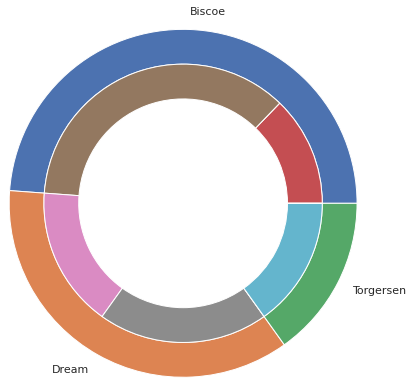

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=2, wedgeprops=dict(width=0.4));
plt.pie(c.values.flatten(), radius=1.6, wedgeprops=dict(width=0.4));

In [ ]:
#set colors to make visualisation better

cmap = plt.get_cmap('tab20c')
o_clr = cmap(np.array([0,4,8]))
i_clr = cmap(np.array([1,2,3,5,6,7,9,10,11]))

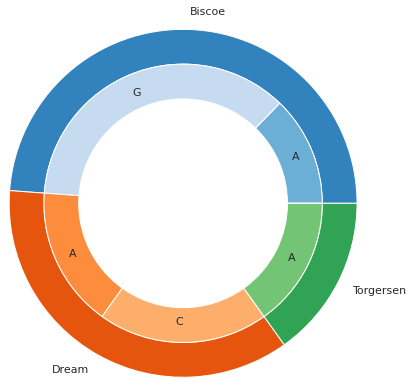

In [ ]:
plt.pie(c.sum(axis=1), labels=c.index, radius=2, wedgeprops=dict(width=0.4), colors=o_clr);
plt.pie(c.values.flatten(),labels=['A', '', 'G', 'A', 'C', '', 'A', '', '' ], labeldistance=0.85, radius=1.6, wedgeprops=dict(width=0.4), colors=i_clr);

####Stacked Bar Plot

In [ ]:
url = 'https://api.covid19india.org/states_daily.json'
import urllib
import json
urllib.request.urlretrieve(url, 'data.json')

with open('data.json') as f:
    data = json.load(f)
data = data["states_daily"]
covid_data = pd.json_normalize(data)

In [ ]:
covid_data.drop('date', axis=1, inplace=True)
covid_data.set_index('dateymd', inplace=True)

In [ ]:
covid_data.drop('tt', inplace=True, axis=1)

In [ ]:
df = covid_data.tail(3)
df.set_index('status', inplace=True)

In [ ]:
df = df.T

In [ ]:
df = df.apply(pd.to_numeric, axis=1)

In [ ]:
df.head()

status  Confirmed  Recovered  Deceased
an             21         16         0
ap            753       1507        13
ar             56         88         0
as            186        405         1
br            517        597         5

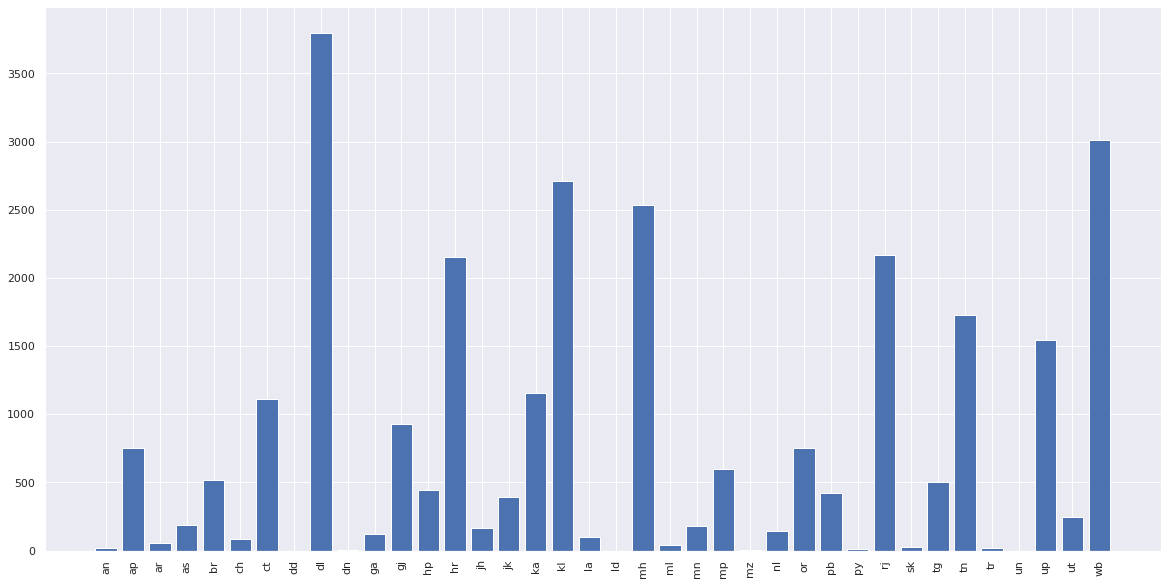

In [ ]:
#now we will plot the stacked bar plots
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "Confirmed"]);
plt.xticks(rotation=90);


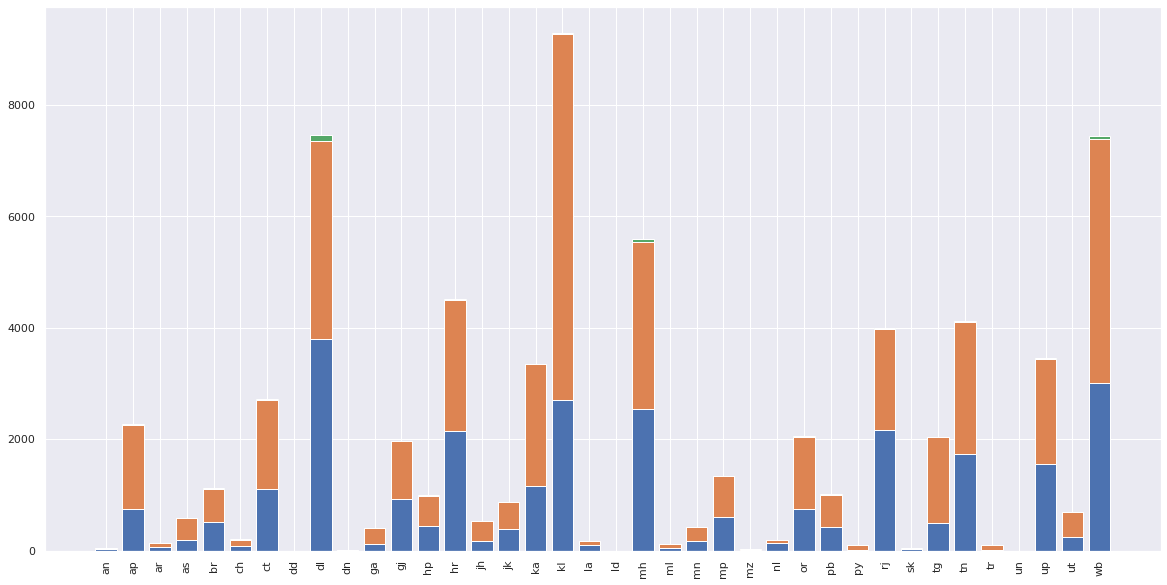

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "Confirmed"]);
plt.bar(df.index, df.loc[:, "Recovered"], bottom=df.loc[:, 'Confirmed']);
plt.bar(df.index, df.loc[:, "Deceased"], bottom=df.loc[:, 'Confirmed']+df.loc[:, "Recovered"]);

plt.xticks(rotation=90);

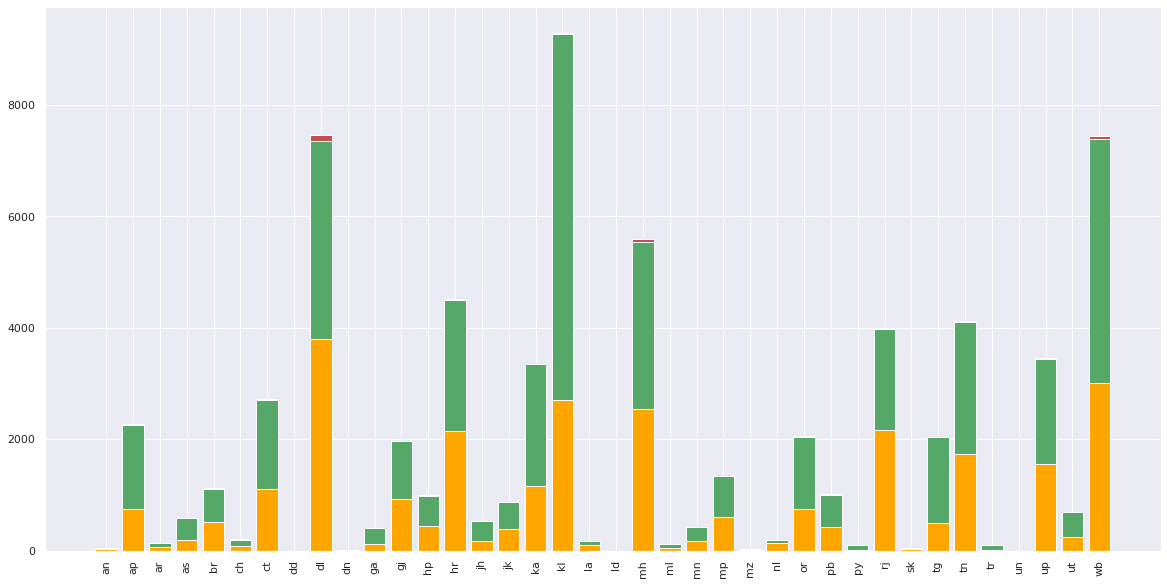

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "Confirmed"], color='orange');
plt.bar(df.index, df.loc[:, "Recovered"], bottom=df.loc[:, 'Confirmed'], color='g');
plt.bar(df.index, df.loc[:, "Deceased"], bottom=df.loc[:, 'Confirmed']+df.loc[:, "Recovered"], color='r');

plt.xticks(rotation=90);



.



ANNOTATION


.



In [ ]:
for i, val in enumerate(df.index):
    print(i,val)
    

0 an
1 ap
2 ar
3 as
4 br
5 ch
6 ct
7 dd
8 dl
9 dn
10 ga
11 gj
12 hp
13 hr
14 jh
15 jk
16 ka
17 kl
18 la
19 ld
20 mh
21 ml
22 mn
23 mp
24 mz
25 nl
26 or
27 pb
28 py
29 rj
30 sk
31 tg
32 tn
33 tr
34 un
35 up
36 ut
37 wb


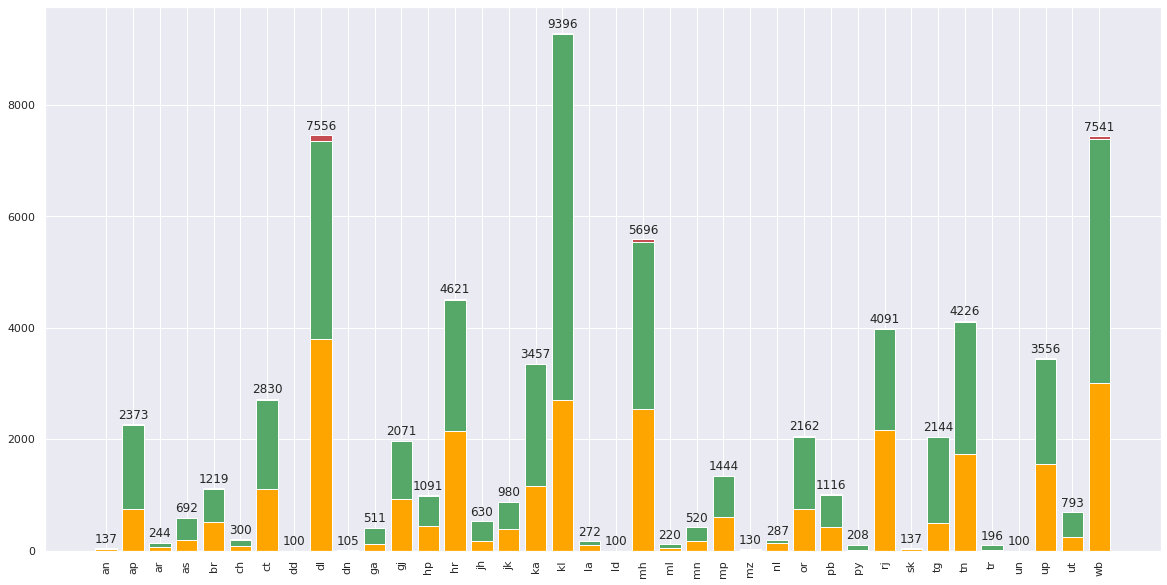

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "Confirmed"], color='orange');
plt.bar(df.index, df.loc[:, "Recovered"], bottom=df.loc[:, 'Confirmed'], color='g');
plt.bar(df.index, df.loc[:, "Deceased"], bottom=df.loc[:, 'Confirmed']+df.loc[:, "Recovered"], color='r');

plt.xticks(rotation=90);

#annotation

for i, val in enumerate(df.index):
    y = df.loc[val].sum() +100
    x = i
    plt.text(x,y, y, ha='center')

####Relative stacked Bar Plots

In [ ]:
covid_data.tail()

an    ap  ar   as   br   ch  ...    tn  tr un    up   ut    wb
dateymd                                  ...                              
2020-11-15  15  2140  79  389  614   87  ...  2520  64  0  1783  218  4480
2020-11-15   0    14   0    2    5    2  ...    12   0  0    18    5    51
2020-11-16  21   753  56  186  517   82  ...  1725  17  0  1546  243  3012
2020-11-16  16  1507  88  405  597  116  ...  2384  77  0  1889  441  4376
2020-11-16   0    13   0    1    5    2  ...    17   2  0    21    9    53

[5 rows x 39 columns]

In [ ]:
df.head()

status  Confirmed  Recovered  Deceased
an             21         16         0
ap            753       1507        13
ar             56         88         0
as            186        405         1
br            517        597         5

In [ ]:
df["total"] = df.sum(axis=1)

In [ ]:
df["CR"] = df["Confirmed"]/df["total"]
df["RR"] = df["Recovered"]/df["total"]
df["DR"] = df["Deceased"]/df["total"]

In [ ]:
df[np.isinf(df)] = 0

In [ ]:
df[np.isnan(df)] = 0

In [ ]:
df.head()

status  Confirmed  Recovered  Deceased  total        CR        RR        DR
an             21         16         0     37  0.567568  0.432432  0.000000
ap            753       1507        13   2273  0.331280  0.663000  0.005719
ar             56         88         0    144  0.388889  0.611111  0.000000
as            186        405         1    592  0.314189  0.684122  0.001689
br            517        597         5   1119  0.462020  0.533512  0.004468

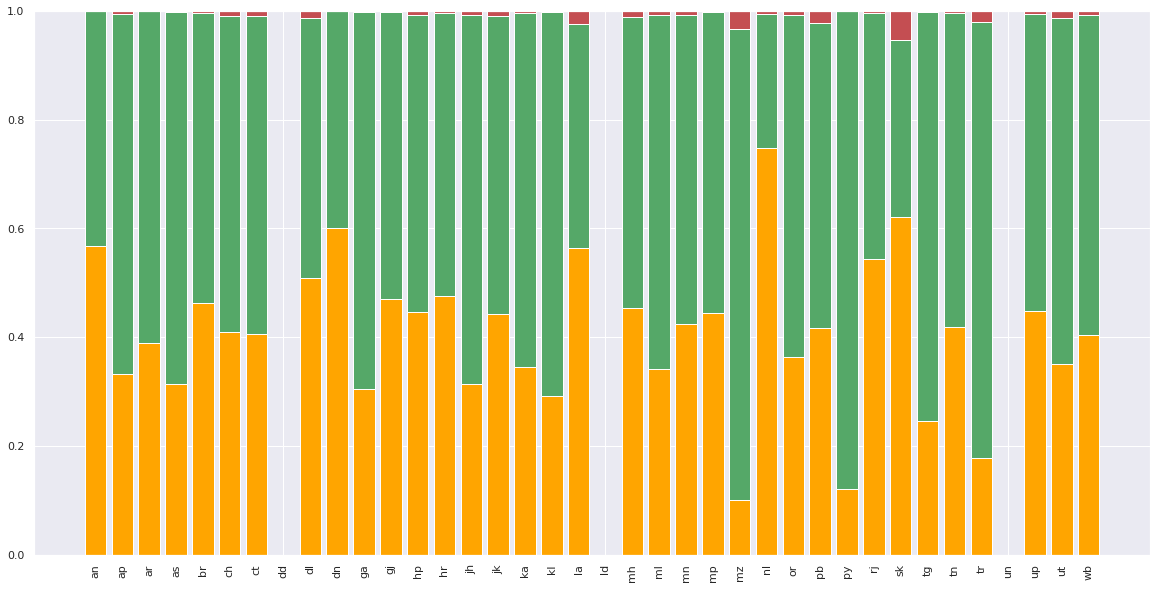

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "CR"], color='orange');
plt.bar(df.index, df.loc[:, "RR"], bottom=df.loc[:, 'CR'], color='g');
plt.bar(df.index, df.loc[:, "DR"], bottom=df.loc[:, 'CR']+df.loc[:, "RR"], color='r');

plt.xticks(rotation=90);

In [ ]:
df.sort_values('CR', ascending=False, inplace=True)

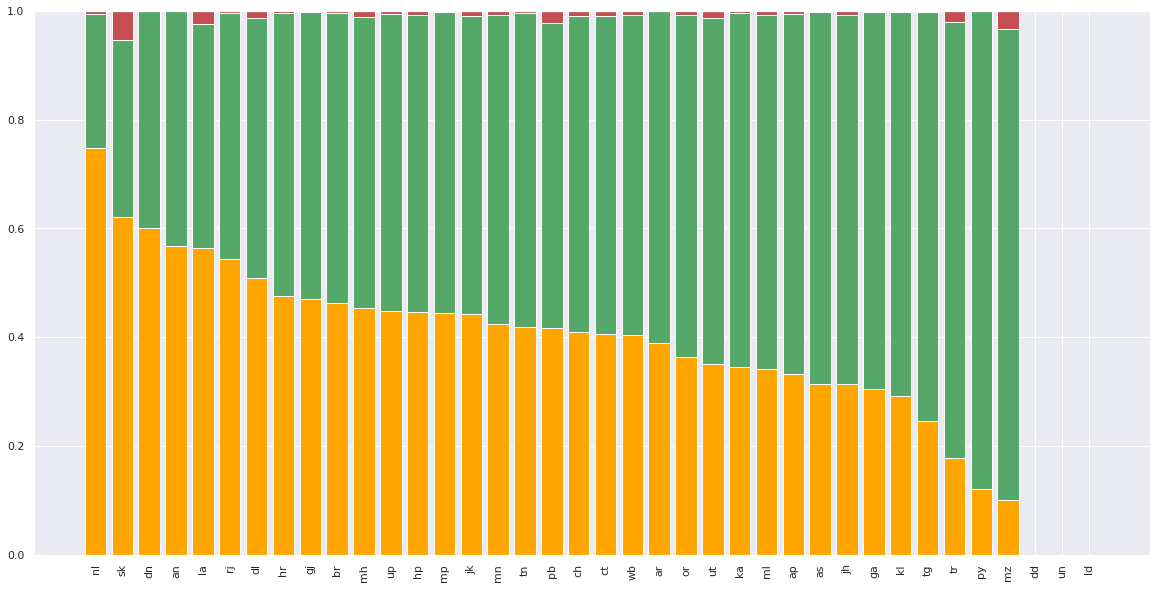

In [ ]:
#plotting sorted data for RELATIVE stacked bar graph
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "CR"], color='orange');
plt.bar(df.index, df.loc[:, "RR"], bottom=df.loc[:, 'CR'], color='g');
plt.bar(df.index, df.loc[:, "DR"], bottom=df.loc[:, 'CR']+df.loc[:, "RR"], color='r');

plt.xticks(rotation=90);

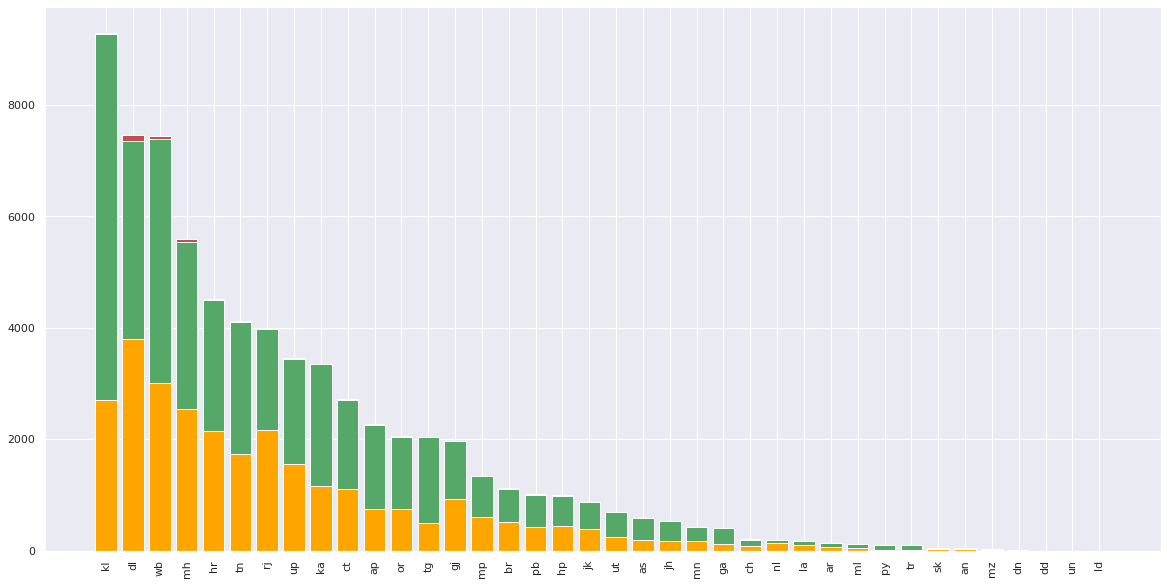

In [ ]:
#plotting sorted data for stacked bar graph

df.sort_values('total', inplace=True, ascending=False)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.bar(df.index, df.loc[:, "Confirmed"], color='orange');
plt.bar(df.index, df.loc[:, "Recovered"], bottom=df.loc[:, 'Confirmed'], color='g');
plt.bar(df.index, df.loc[:, "Deceased"], bottom=df.loc[:, 'Confirmed']+df.loc[:, "Recovered"], color='r');

plt.xticks(rotation=90);

#annotation


###Dynamic Composition- Time Varying Composition

####Stacked Area Plots

In [ ]:
covid_data.head()


an ap ar as br ch ct dd dl dn  ... rj sk     status tg tn tr un  up ut wb
dateymd                                   ...                                       
2020-03-14  0  1  0  0  0  0  0  0  7  0  ...  3  0  Confirmed  1  1  0  0  12  0  0
2020-03-14  0  0  0  0  0  0  0  0  1  0  ...  1  0  Recovered  0  0  0  0   4  0  0
2020-03-14  0  0  0  0  0  0  0  0  1  0  ...  0  0   Deceased  0  0  0  0   0  0  0
2020-03-15  0  0  0  0  0  0  0  0  0  0  ...  1  0  Confirmed  2  0  0  0   1  0  0
2020-03-15  0  0  0  0  0  0  0  0  1  0  ...  2  0  Recovered  1  0  0  0   0  0  0

[5 rows x 39 columns]

In [ ]:
#now we create a df with a perticular state, date and status

df = covid_data[
                ['mh', 'status']
                ]

In [ ]:
df.head()

mh     status
dateymd                  
2020-03-14  14  Confirmed
2020-03-14   0  Recovered
2020-03-14   0   Deceased
2020-03-15  18  Confirmed
2020-03-15   0  Recovered

In [ ]:
df.mh = pd.to_numeric(df['mh'])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, 2020-03-14 to 2020-11-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mh      744 non-null    int64 
 1   status  744 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.4+ KB


In [ ]:
df['date'] = df.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#df.index(np.arrange(0,1))
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

mh     status        date
0  14  Confirmed  2020-03-14
1   0  Recovered  2020-03-14
2   0   Deceased  2020-03-14
3  18  Confirmed  2020-03-15
4   0  Recovered  2020-03-15

now what we want is a table like this - >



``
date         |conf     | rec      | deceased

2020-03-14   |14       | 0        | 0
``

this is a common transformation in pandas



we use PIVOT

#####Maharashtra Data

In [ ]:
df = df.pivot_table(values="mh", columns='status', index = 'date')

In [ ]:
#df.status.unique()

AttributeError: ignored

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df

In [ ]:
df.plot.area()

#####Delhi data

In [ ]:
df_dl = covid_data[
                ['dl', 'status']
                ]

In [ ]:
df_dl.reset_index(inplace=True)

In [ ]:
df_dl.head()

dateymd dl     status
0  2020-03-14  7  Confirmed
1  2020-03-14  1  Recovered
2  2020-03-14  1   Deceased
3  2020-03-15  0  Confirmed
4  2020-03-15  1  Recovered

In [ ]:
df_dl['dl'] = pd.to_numeric(df_dl['dl'])
df_dl['dateymd'] = pd.to_datetime(df_dl['dateymd'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dateymd  744 non-null    datetime64[ns]
 1   dl       744 non-null    int64         
 2   status   744 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.6+ KB


In [ ]:
#now pivoting
df_dl = df_dl.pivot_table(values='dl', index='dateymd', columns='status')

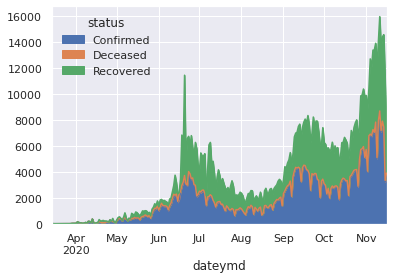

In [ ]:
df_dl.plot.area()

#####using MATPLOTLIB

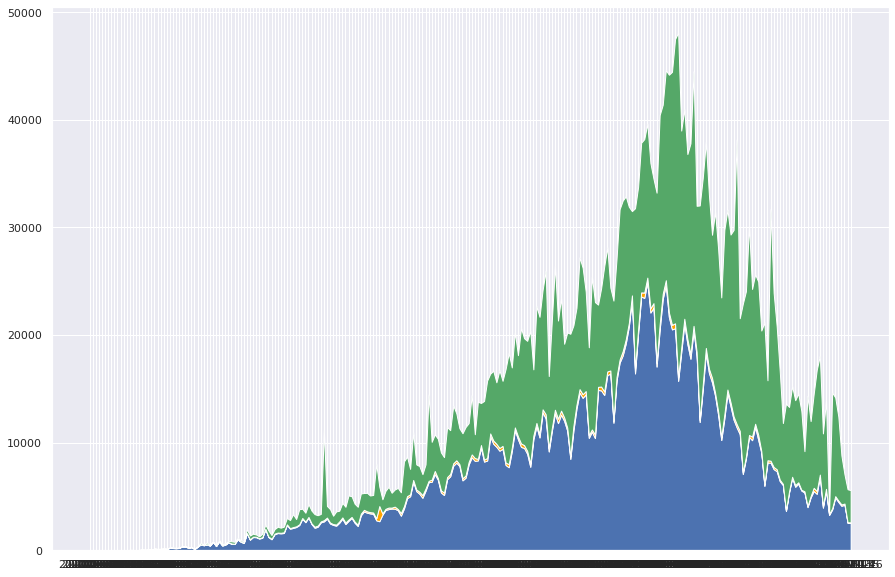

In [ ]:
#for maharashtra
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.stackplot(df.index, df.loc[:, 'Confirmed'],df.loc[:, 'Deceased'],df.loc[:, 'Recovered'] , colors=['b', 'orange', 'g'] )

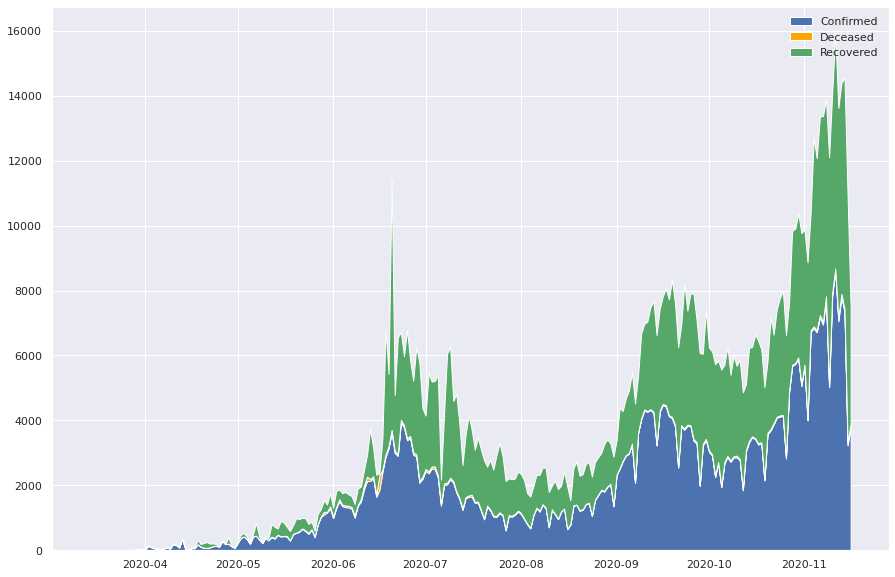

In [ ]:
#for Delhi
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.stackplot(df_dl.index, df_dl.loc[:, 'Confirmed'], df_dl.loc[:, 'Deceased'], df_dl.loc[:, 'Recovered'],colors=['b', 'orange', 'g'], labels = ['Confirmed', 'Deceased', 'Recovered'])
plt.legend();

#####Relative Stacked area plot


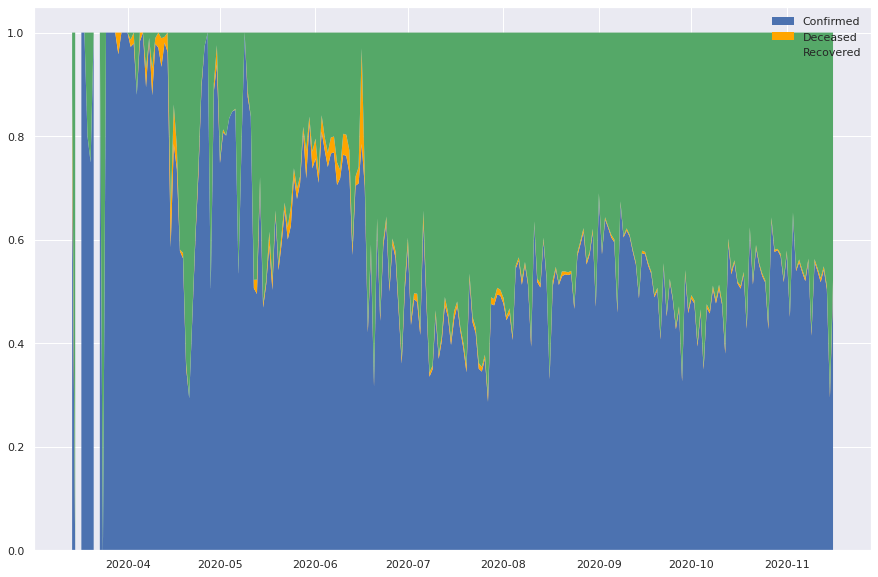

In [ ]:
#for Delhi, RELATIVE STACKED AREA PLOT
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.stackplot(df_dl.index, df_dl.loc[:, 'Confirmed']/df_dl.sum(axis=1),
              df_dl.loc[:, 'Deceased']/df_dl.sum(axis=1), 
              df_dl.loc[:, 'Recovered']/df_dl.sum(axis=1),
              colors=['b', 'orange', 'g'], 
              labels = ['Confirmed', 'Deceased', 'Recovered'], linewidth=0.01)
plt.legend();

Text(0.5, 1.0, 'MH')

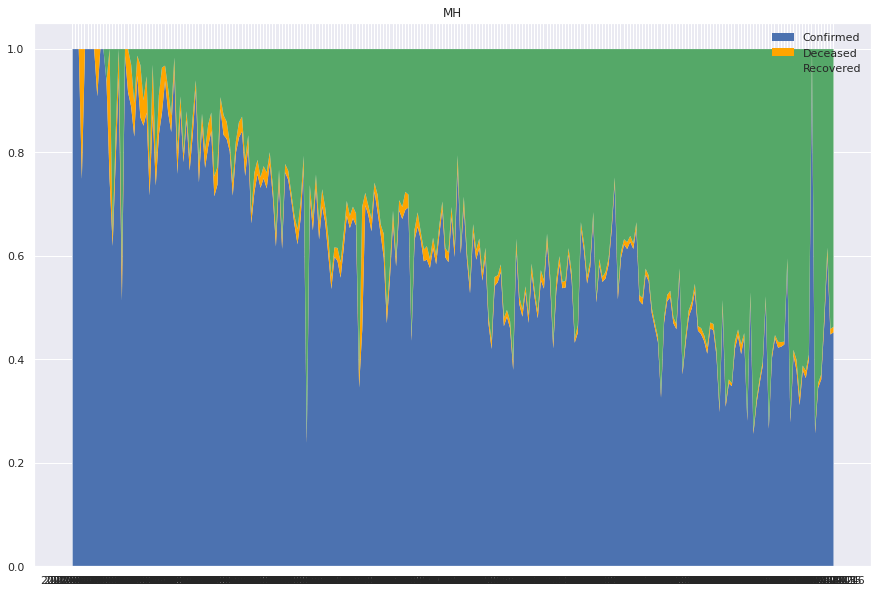

In [ ]:
#for MH, RELATIVE STACKED AREA PLOT
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.stackplot(df.index, df.loc[:, 'Confirmed']/df.sum(axis=1),
              df.loc[:, 'Deceased']/df.sum(axis=1), 
              df.loc[:, 'Recovered']/df.sum(axis=1),
              colors=['b', 'orange', 'g'], 
              labels = ['Confirmed', 'Deceased', 'Recovered'], linewidth=0.01)
plt.legend();
plt.title("MH")

##PLOTTING THE RELATIONSHIPS BETWEEN DATA

###Scatter plot

In [ ]:
t = sns.load_dataset('tips')

In [ ]:
t.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

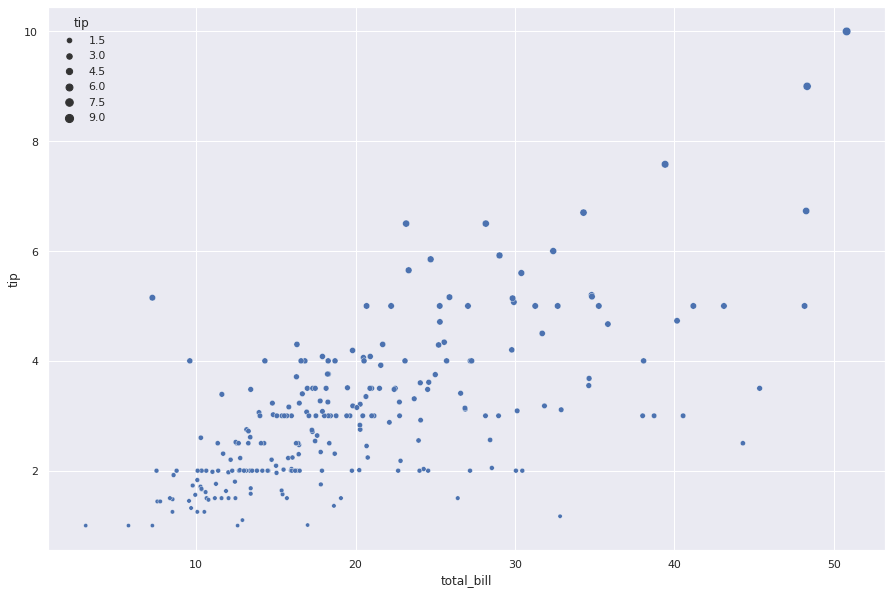

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='total_bill', y='tip', data=t, size='tip')

In [ ]:
t["tip_fraction"] = t["tip"]/t["total_bill"]

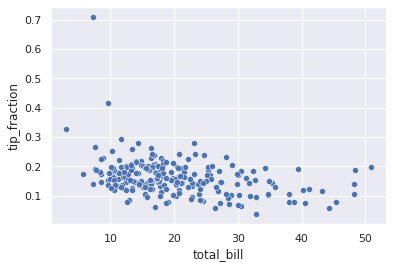

In [ ]:
#if it were to be a linear relation, we would get roughly the same fraction values, but we see a downward trend
#meaning, that as the total bill increases, tip isn't constantly increasing
sns.scatterplot(x="total_bill", y='tip_fraction', data=t)

.

.

argument = hue

.

.

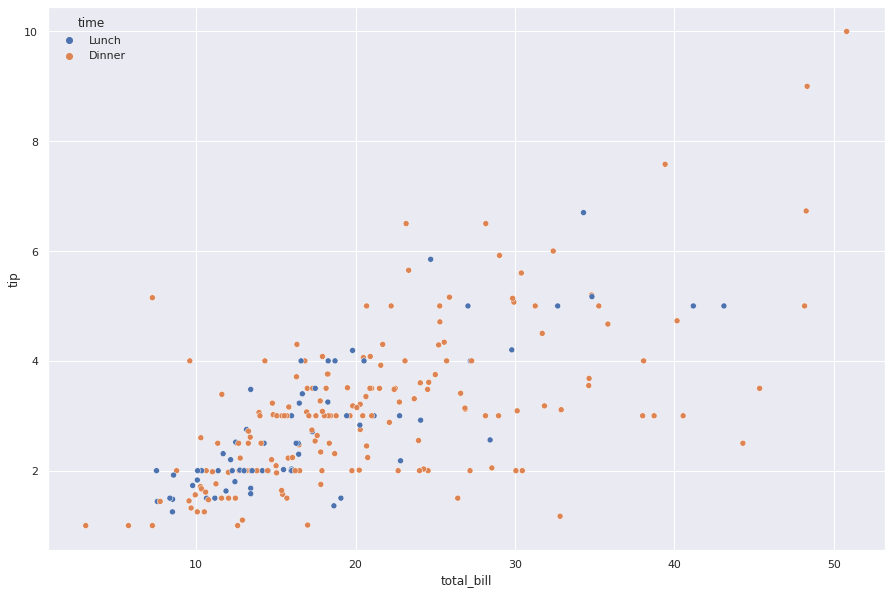

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='total_bill', y='tip', data=t, 
                hue='time')

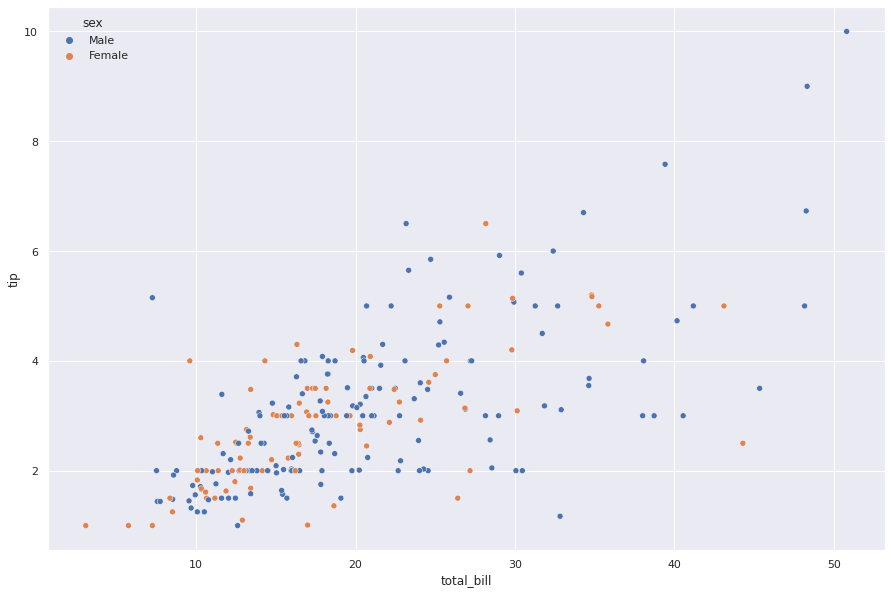

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='total_bill', y='tip', data=t, 
                hue='sex')

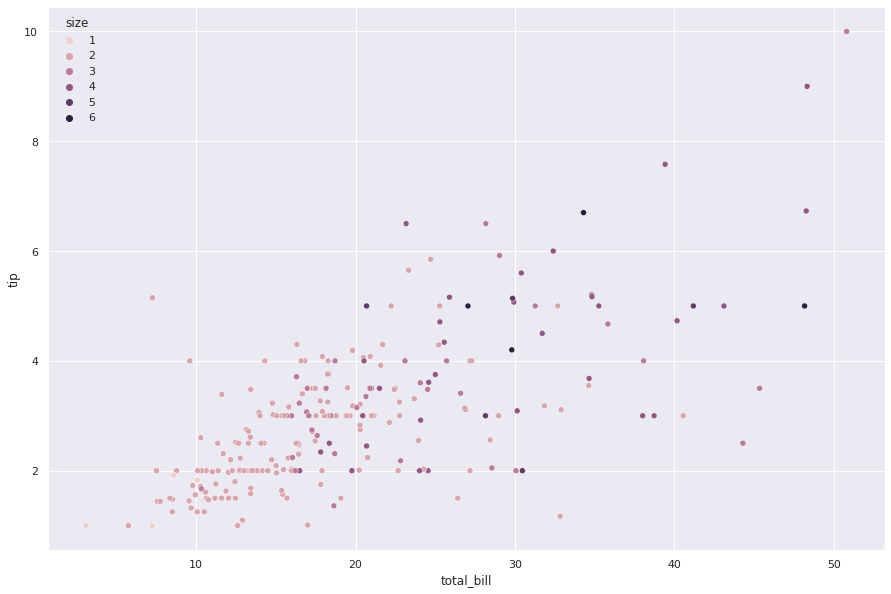

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='total_bill', y='tip', data=t, 
                hue='size')

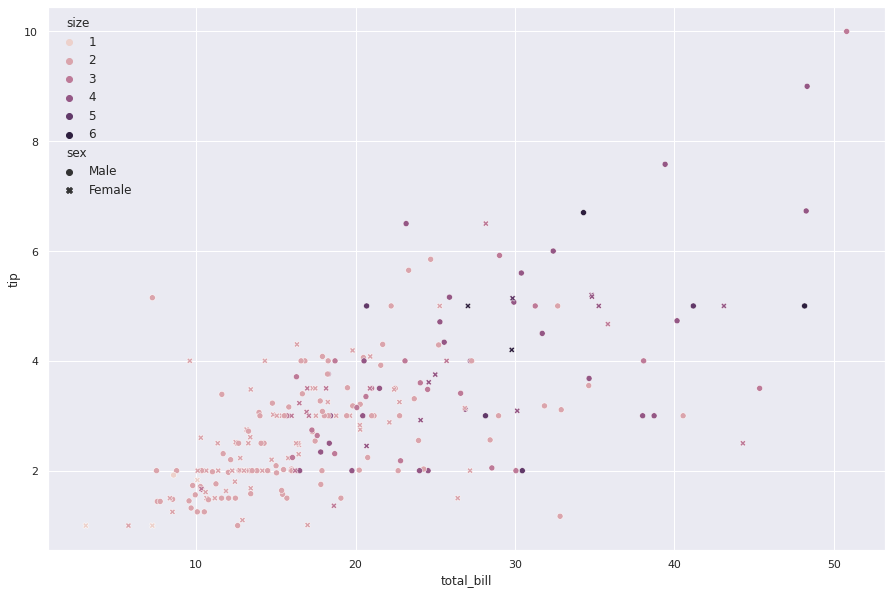

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='total_bill', y='tip', data=t, 
                hue='size', style='sex')

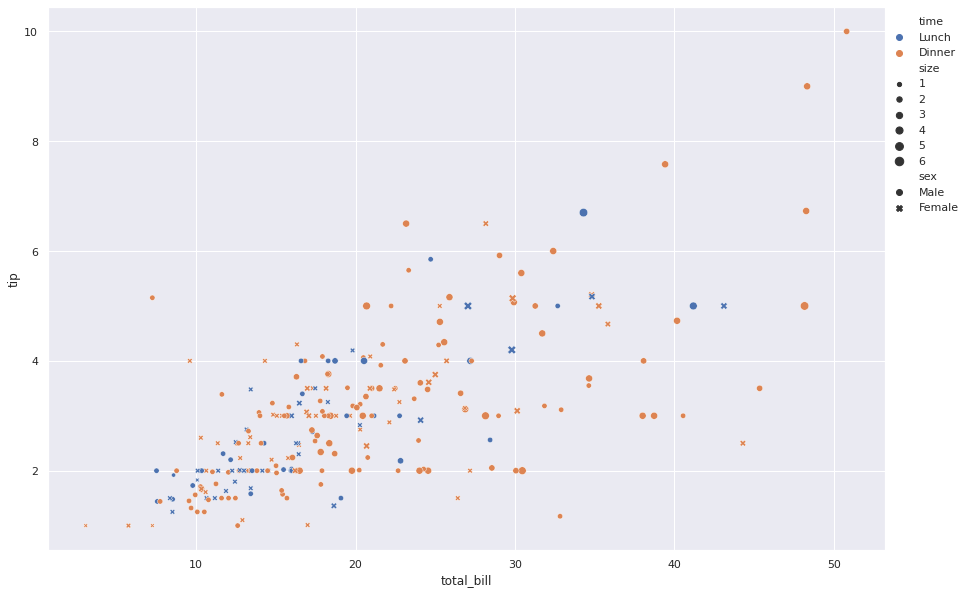

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(x='total_bill', y='tip', data=t, 
                hue='time', style='sex', size='size')

plt.legend(bbox_to_anchor=(1.10, 1))

###Regression plot - reg plot

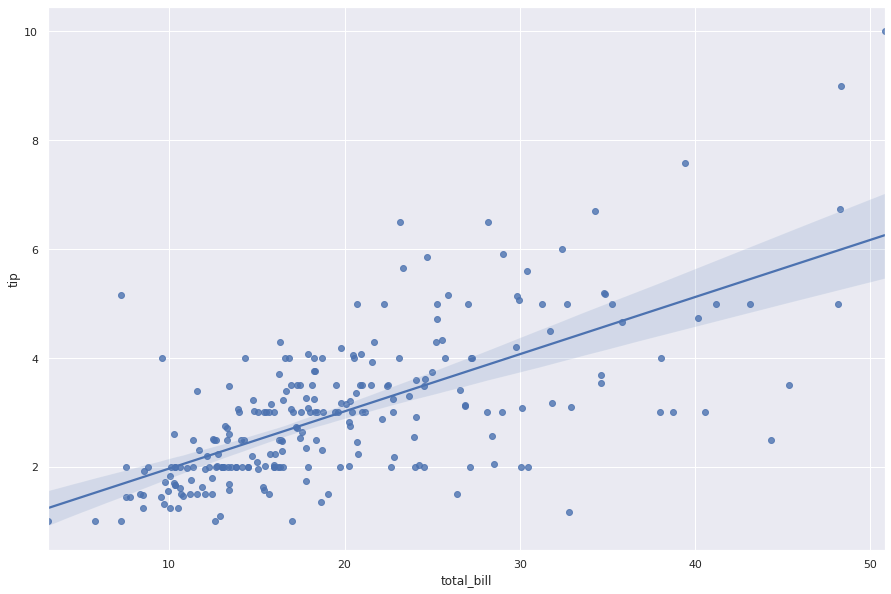

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.regplot(x='total_bill', y='tip', data=t)

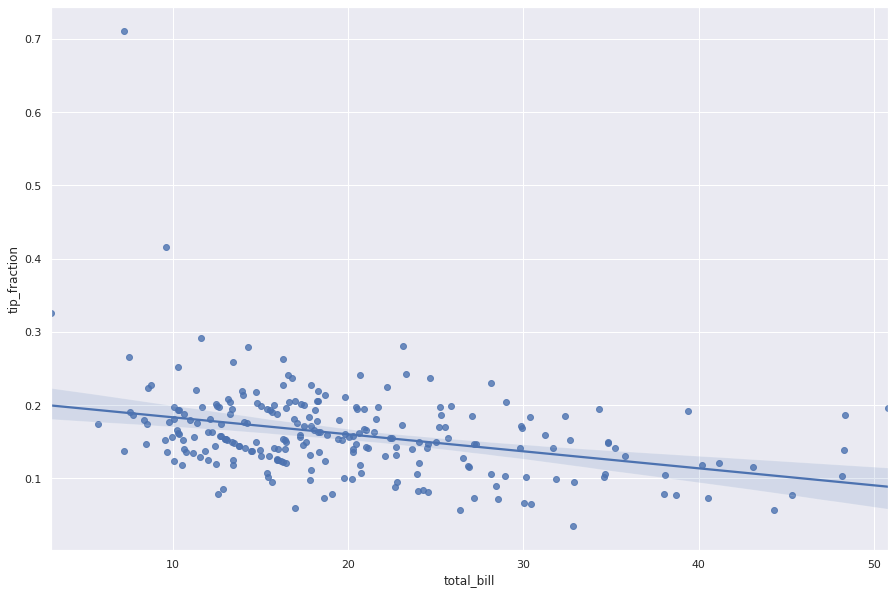

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.regplot(x='total_bill', y='tip_fraction', data=t)

In [ ]:
d = sns.load_dataset('diamonds')


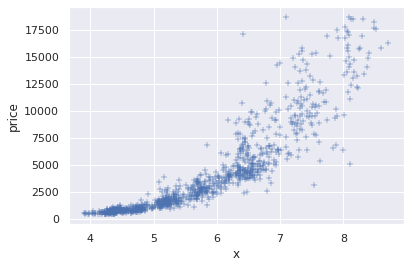

In [ ]:
sns.scatterplot(x='x', y='price', data=d.sample(1000), marker='+')

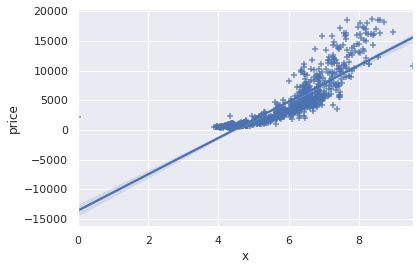

In [ ]:
sns.regplot(x='x', y='price', data=d.sample(1000), marker='+')

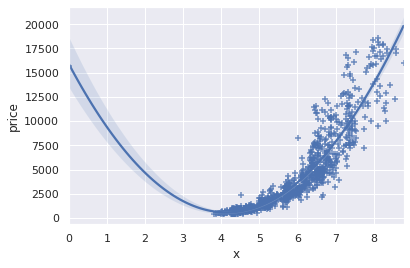

In [ ]:
sns.regplot(x='x', y='price', data=d.sample(1000), marker='+', order=2)

###Bar plots

####Discrete plot

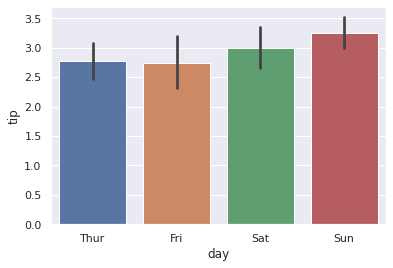

In [ ]:
sns.barplot(x='day', y='tip', data=t)

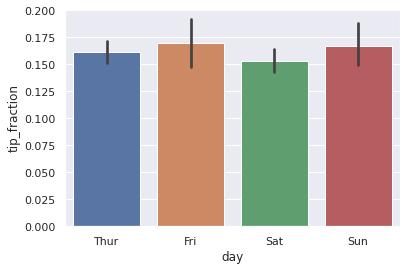

In [ ]:
#   we might think that people give more tip on sunday, but relative plot tells
#   us that there might be more no. of people eating out on sunday
sns.barplot(x='day', y='tip_fraction', data=t)

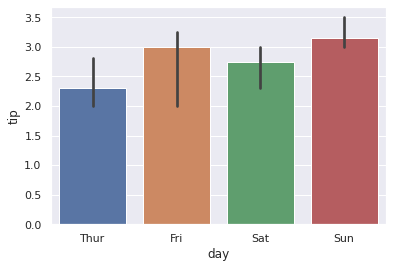

In [ ]:
sns.barplot(x='day', y='tip', data=t, estimator=np.median)

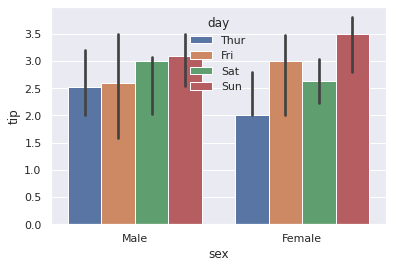

In [ ]:
sns.barplot(x='sex', y='tip', data=t,hue='day', estimator=np.median)



####continuous vs continuous plot

.

.

.

.

.
this is basically coverting a scatter plot into a bar plot, by making use of bins

In [ ]:
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
#   x_q = x_quantised
d['x_q'] = pd.cut(d.loc[:,'x'], bins=15)

In [ ]:
d.head()
#gives us the interval into which, the x falls

carat      cut color clarity  depth  ...  price     x     y     z             x_q
0   0.23    Ideal     E     SI2   61.5  ...    326  3.95  3.98  2.43   (3.58, 4.296]
1   0.21  Premium     E     SI1   59.8  ...    326  3.89  3.84  2.31   (3.58, 4.296]
2   0.23     Good     E     VS1   56.9  ...    327  4.05  4.07  2.31   (3.58, 4.296]
3   0.29  Premium     I     VS2   62.4  ...    334  4.20  4.23  2.63   (3.58, 4.296]
4   0.31     Good     J     SI2   63.3  ...    335  4.34  4.35  2.75  (4.296, 5.012]

[5 rows x 11 columns]

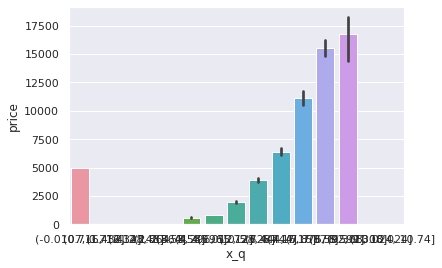

In [ ]:
sns.barplot(x='x_q', y='price', data=d.sample(1000))

In [ ]:
# to avoid this overlapping

d['x_q'] = pd.cut(d.loc[:,'x'], bins=15, labels=False)


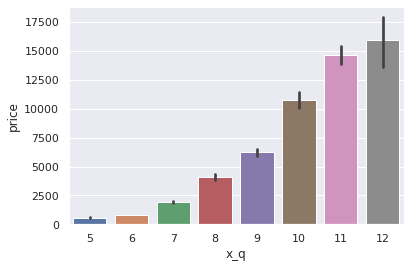

In [ ]:
sns.barplot(x='x_q', y='price', data=d.sample(1000))

###Line Plot

In [ ]:
f = sns.load_dataset("fmri")

In [ ]:
f.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

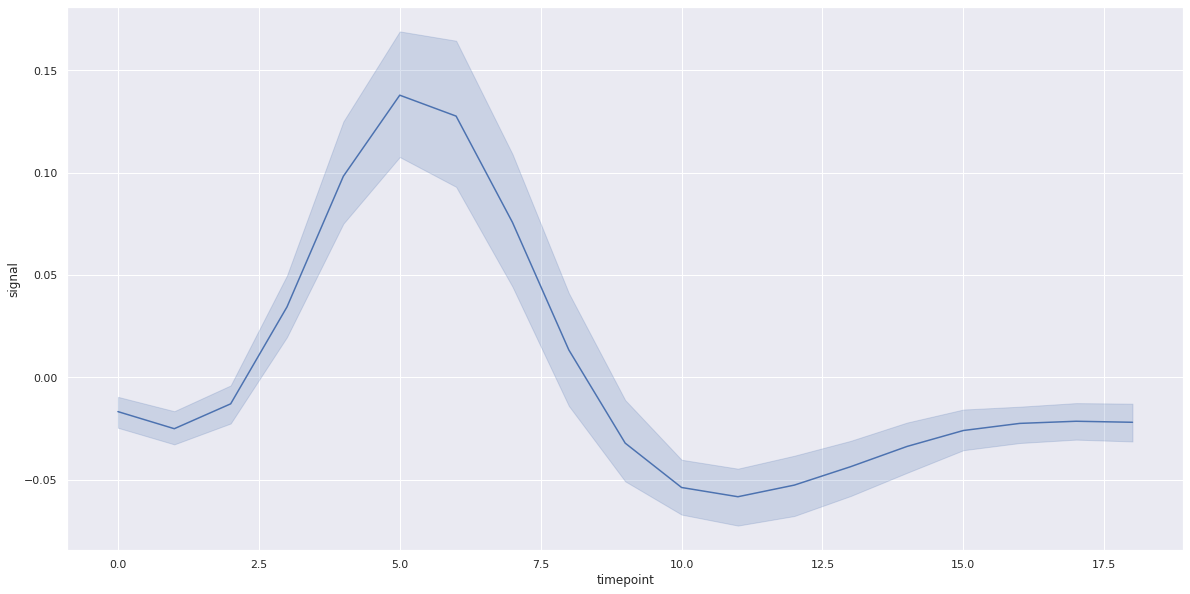

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', data=f)

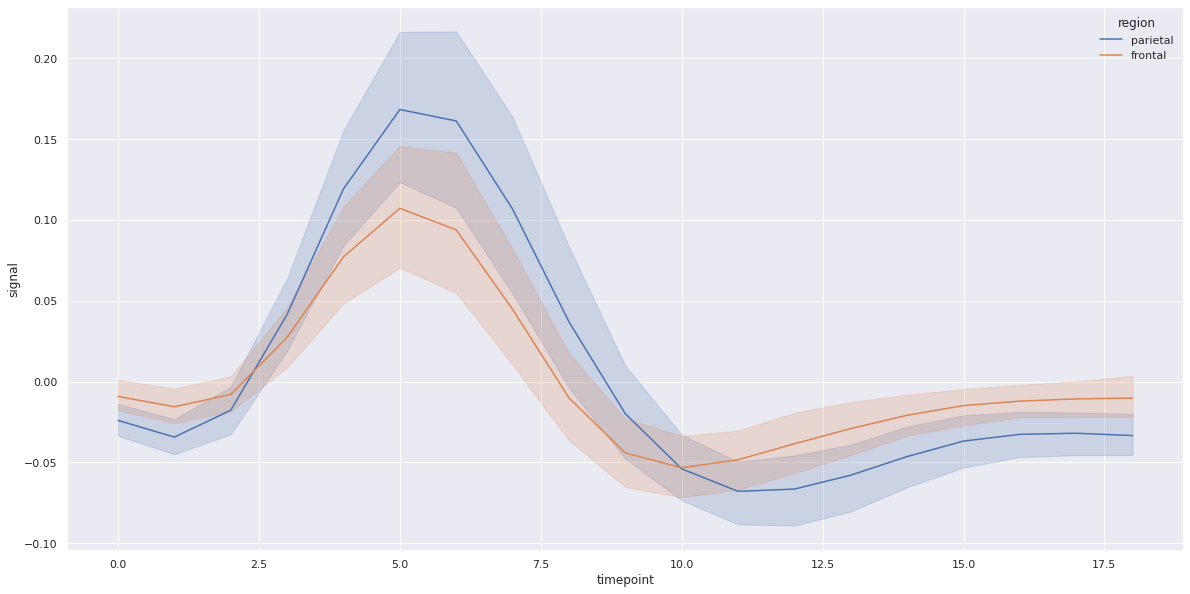

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', hue='region', data=f)

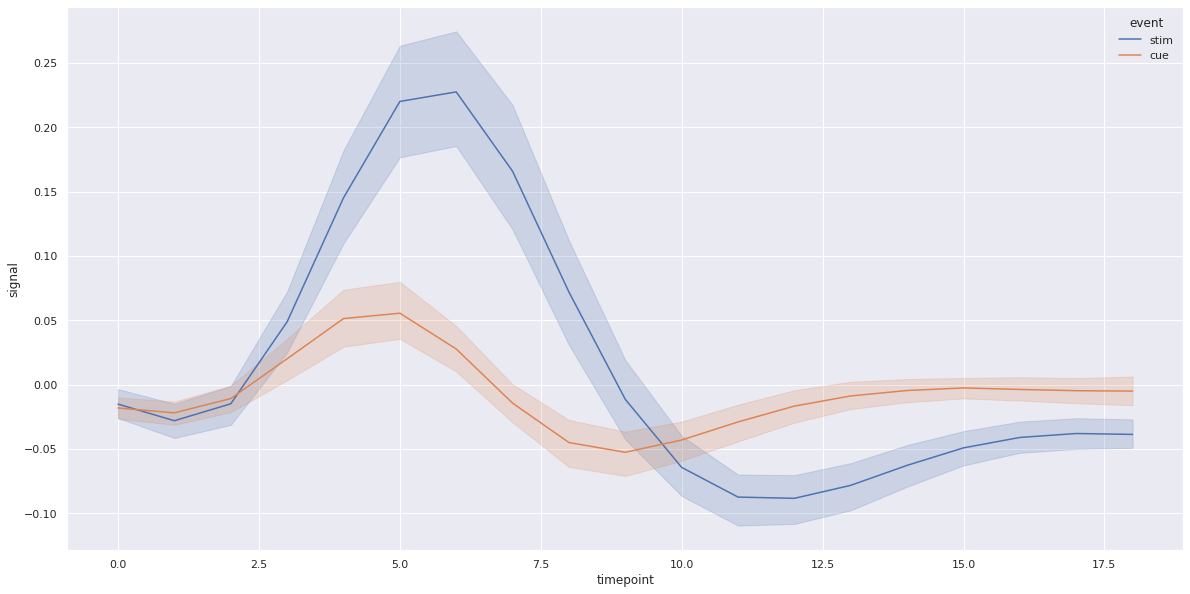

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', hue='event', data=f)

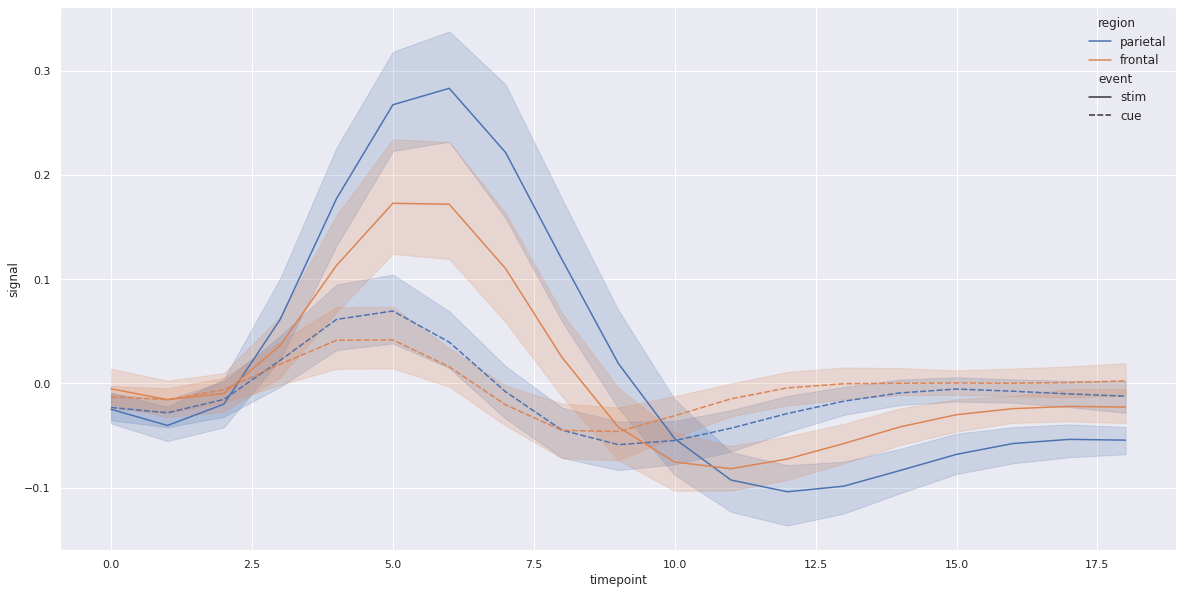

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', hue='region', data=f, style='event')

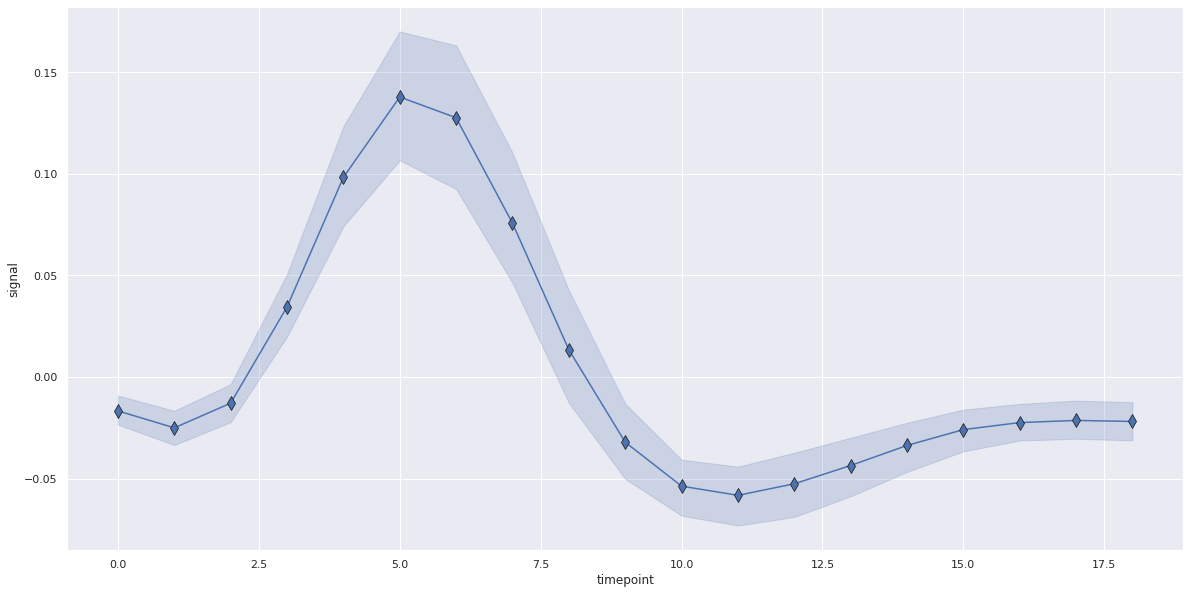

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', marker='d',markeredgecolor = 'k', markersize=10, data=f)

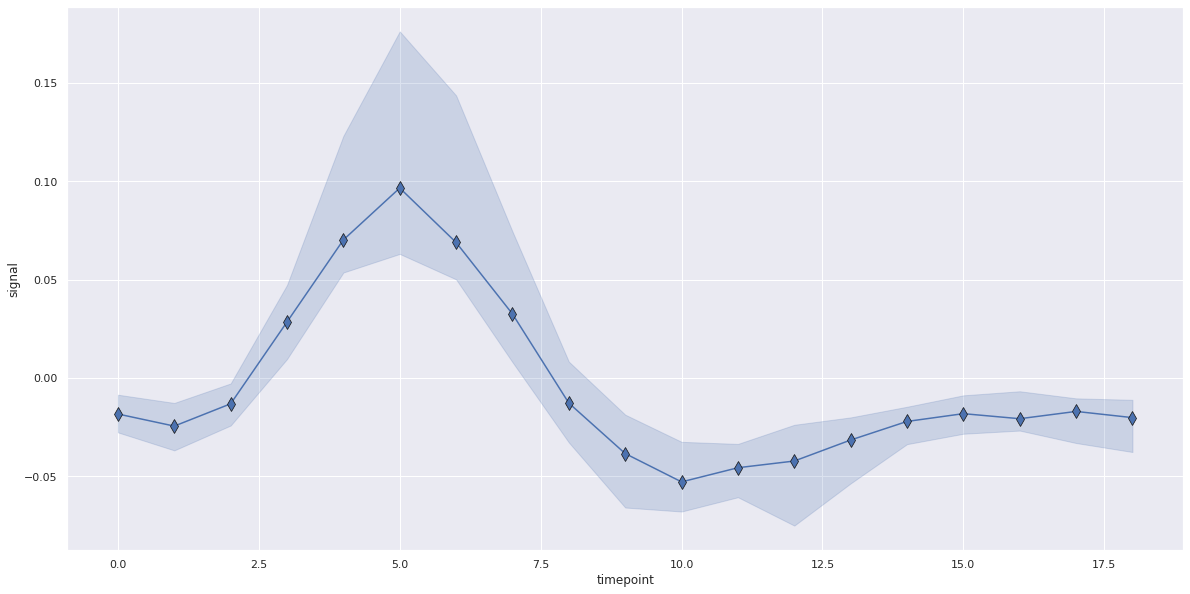

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', marker='d',markeredgecolor = 'k', markersize=10, data=f, estimator=np.median)

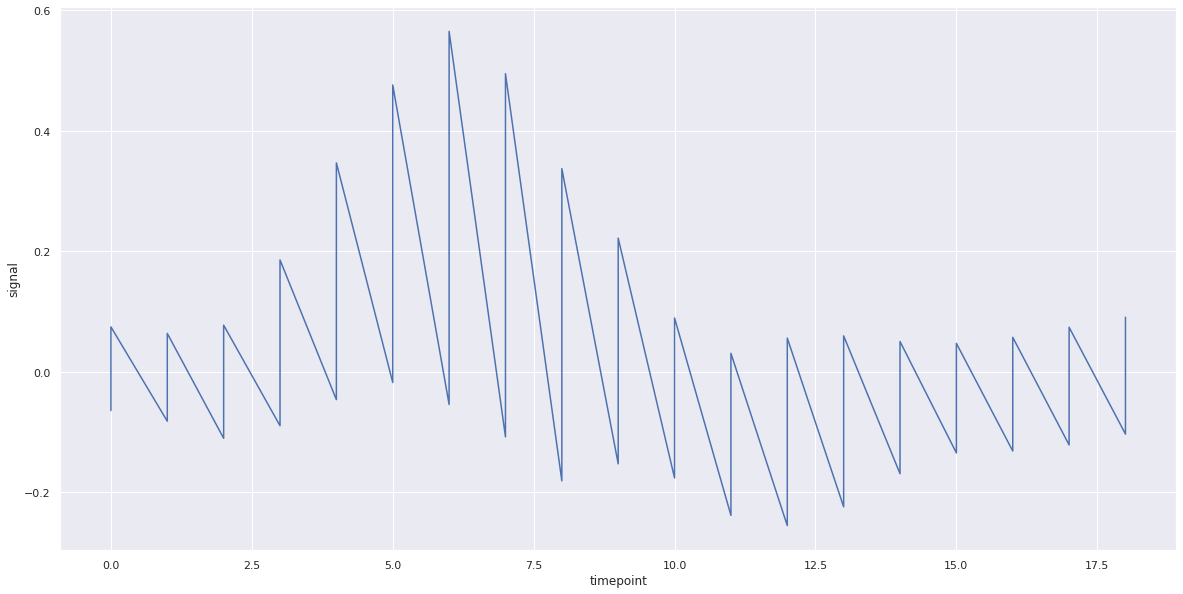

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', data=f, estimator=None)

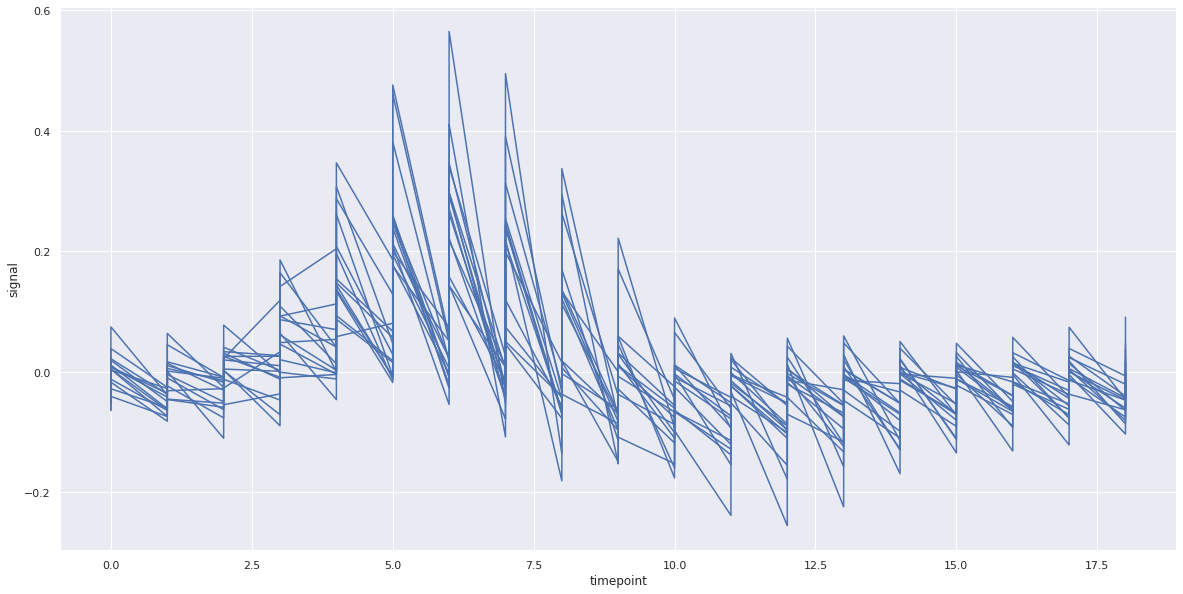

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', data=f, estimator=None, units='subject')

In [ ]:
#to fix this distorted curve, we can take a smaller data set
f_ = f[(f.loc[:, 'region'] == 'parietal') & (f.event == 'cue')]

In [ ]:
f_.head()

subject  timepoint event    region    signal
532      s3          4   cue  parietal  0.058219
533      s6          5   cue  parietal  0.038145
534      s7          5   cue  parietal -0.008158
535      s8          5   cue  parietal  0.047136
536      s9          5   cue  parietal  0.055847

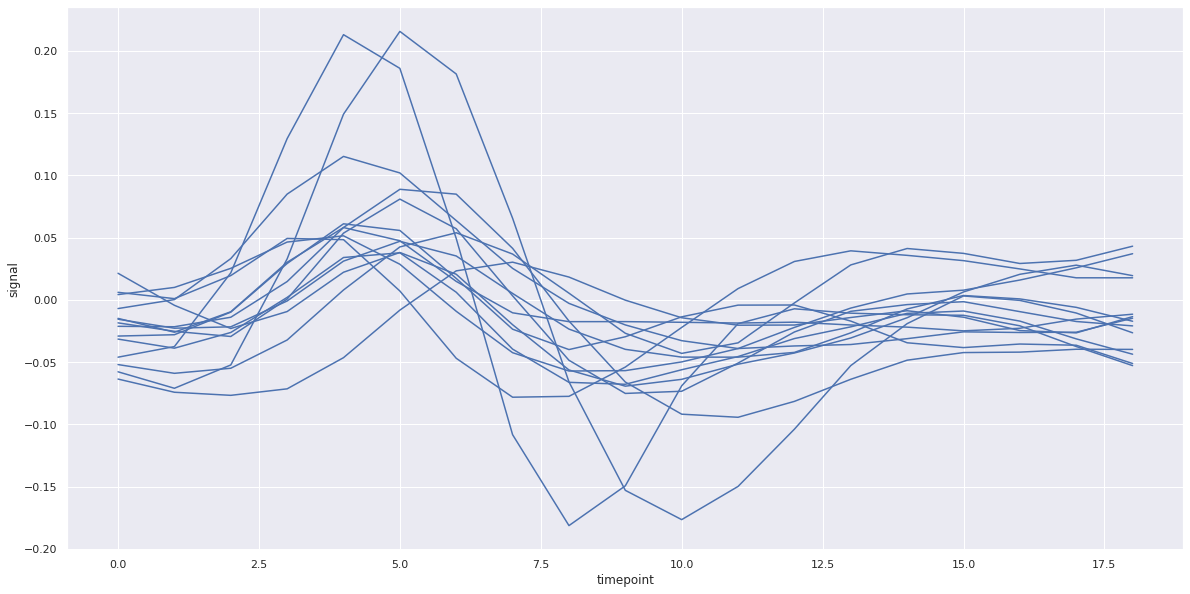

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', data=f_, estimator=None, units='subject')

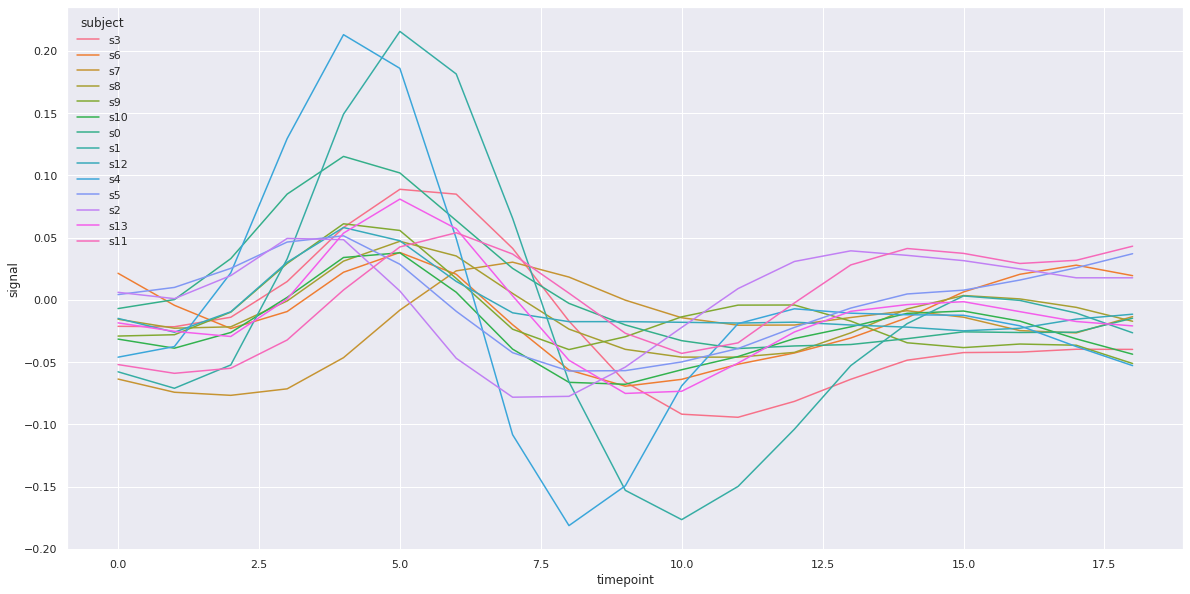

In [ ]:
#we can use hue too, but sometimes same color is better
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(x='timepoint', y='signal', data=f_, estimator=None, hue='subject')

###Line PLot with Covid Data

.

we will look at time based line plot.

x axis = time

y = confirmed cases per state

In [ ]:
covid_data.head()

an ap ar as br ch ct dd dl dn  ... rj sk     status tg tn tr un  up ut wb
dateymd                                   ...                                       
2020-03-14  0  1  0  0  0  0  0  0  7  0  ...  3  0  Confirmed  1  1  0  0  12  0  0
2020-03-14  0  0  0  0  0  0  0  0  1  0  ...  1  0  Recovered  0  0  0  0   4  0  0
2020-03-14  0  0  0  0  0  0  0  0  1  0  ...  0  0   Deceased  0  0  0  0   0  0  0
2020-03-15  0  0  0  0  0  0  0  0  0  0  ...  1  0  Confirmed  2  0  0  0   1  0  0
2020-03-15  0  0  0  0  0  0  0  0  1  0  ...  2  0  Recovered  1  0  0  0   0  0  0

[5 rows x 39 columns]

In [ ]:
df = covid_data[covid_data['status'] == 'Confirmed']

In [ ]:
df.drop('status', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

an ap ar as br ch ct dd dl dn ga  ... py rj sk tg tn tr un  up ut wb        date
0  0  1  0  0  0  0  0  0  7  0  0  ...  0  3  0  1  1  0  0  12  0  0  2020-03-14
1  0  0  0  0  0  0  0  0  0  0  0  ...  0  1  0  2  0  0  0   1  0  0  2020-03-15
2  0  0  0  0  0  0  0  0  0  0  0  ...  1  0  0  1  0  0  0   0  1  0  2020-03-16
3  0  0  0  0  0  0  0  0  1  0  0  ...  0  0  0  1  0  0  0   2  0  1  2020-03-17
4  0  0  0  0  0  0  0  0  2  0  0  ...  0  3  0  8  1  0  0   2  1  0  2020-03-18

[5 rows x 39 columns]

In [ ]:
df["date"] = df.index
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#to make the desire table, we want...we will use another pandas' utility

df_ = df.melt(id_vars='date', #   id_vars = index variables, we copy paste them from original df, dont want them to change
              value_vars= list(df.columns).remove('date'),   #   value_vars = values we want in column, removed date
              var_name='state',                                 # name for the value_var
              value_name='confirmed')              #name for value column

In [ ]:
df_['date'] = pd.to_datetime(df_['date'])

In [ ]:
df_.loc[:, "confirmed"] = pd.to_numeric(df_.loc[:, 'confirmed'])

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       9424 non-null   datetime64[ns]
 1   state      9424 non-null   object        
 2   confirmed  9424 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 221.0+ KB


(array([737516., 737546., 737577., 737607., 737638., 737669., 737699.,
        737730.]), <a list of 8 Text major ticklabel objects>)

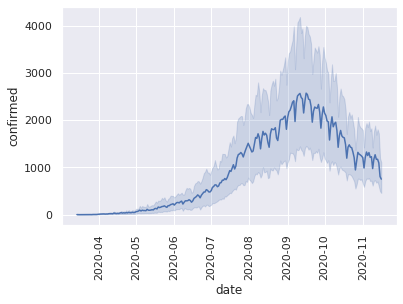

In [ ]:
sns.lineplot(x='date', y='confirmed', data=df_)
plt.xticks(rotation=90)

(array([737516., 737546., 737577., 737607., 737638., 737669., 737699.,
        737730.]), <a list of 8 Text major ticklabel objects>)

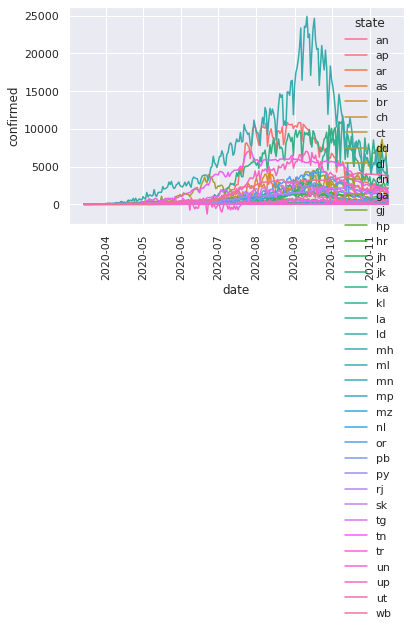

In [ ]:
sns.lineplot(x='date', y='confirmed', data=df_, hue='state')
plt.xticks(rotation=90)

In [ ]:
states = ['mh','dl','tn','kr','wb','ka']

In [ ]:
df_small = df_[df_['state'].isin(states)]

In [ ]:
df_small.head()

date state  confirmed
1984 2020-03-14    dl          7
1985 2020-03-15    dl          0
1986 2020-03-16    dl          0
1987 2020-03-17    dl          1
1988 2020-03-18    dl          2

(array([737516., 737546., 737577., 737607., 737638., 737669., 737699.,
        737730.]), <a list of 8 Text major ticklabel objects>)

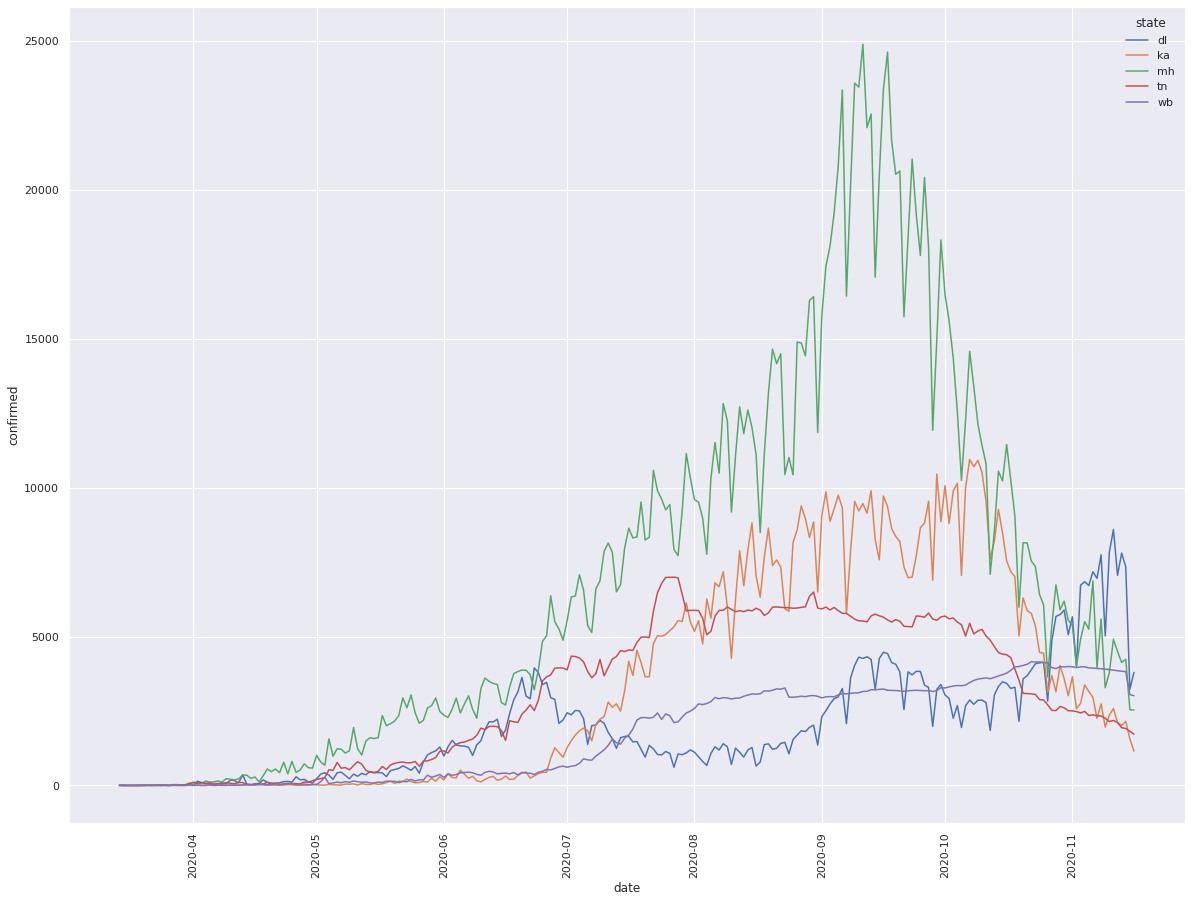

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,15)
sns.lineplot(x='date', y='confirmed', data=df_small, hue='state')
plt.xticks(rotation=90)

(array([737516., 737546., 737577., 737607., 737638., 737669., 737699.,
        737730.]), <a list of 8 Text major ticklabel objects>)

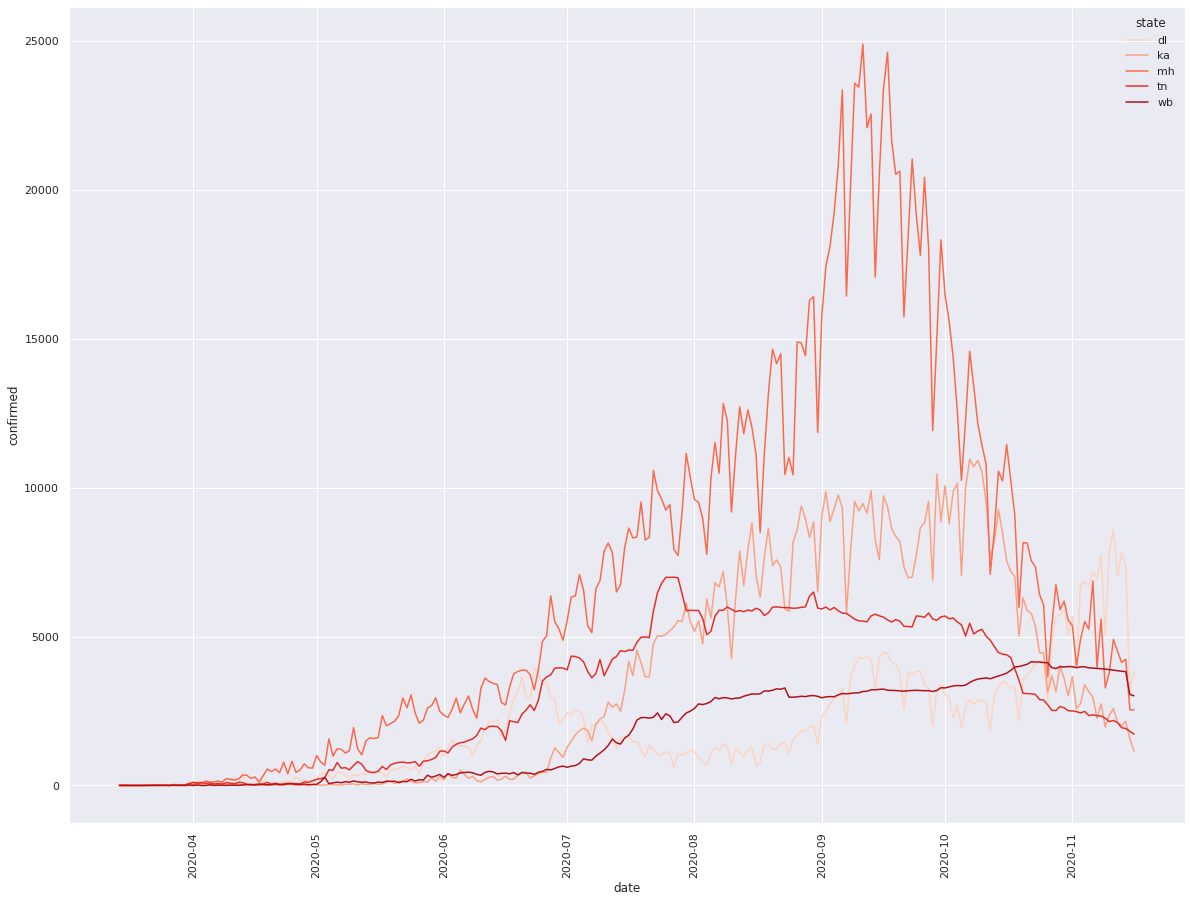

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,15)
sns.lineplot(x='date', y='confirmed', data=df_small, hue='state', 
             palette='Reds')
plt.xticks(rotation=90)

(array([737516., 737546., 737577., 737607., 737638., 737669., 737699.,
        737730.]), <a list of 8 Text major ticklabel objects>)

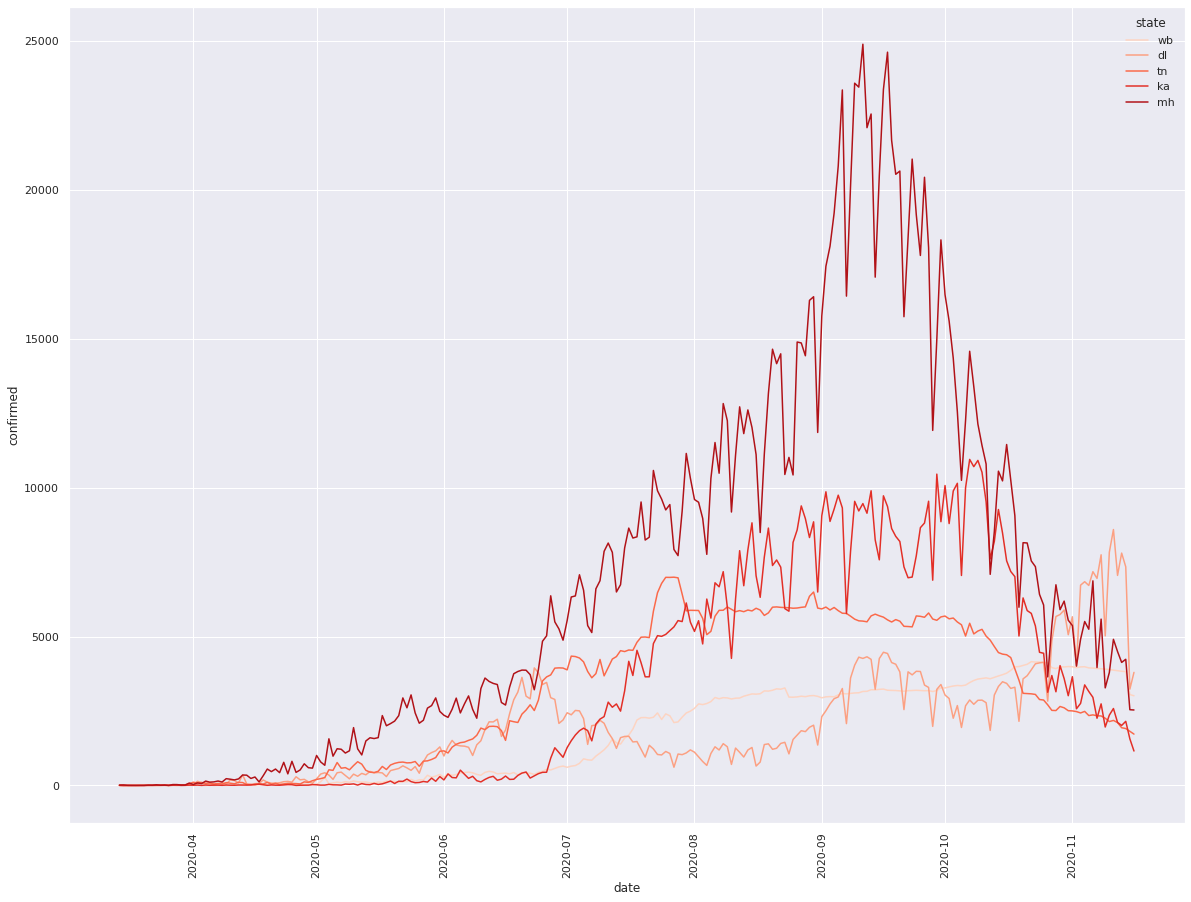

In [ ]:
fig = plt.gcf()
fig.set_size_inches(20,15)
sns.lineplot(x='date', y='confirmed', data=df_small, hue='state', 
             palette='Reds',
             hue_order=['wb', 'dl', 'tn', 'ka', 'mh'])
plt.xticks(rotation=90)

.

.

.

THERE IS A LOT OF NOISE, THE ZIG ZAG CURVES. TO SOLVE THIS, WE CAN PERFORM DO "ROLLING AVG" WITH MEAN FUNCTION, TO GET A SMOOTHER CURVE

after making a df of only confirmed
coverted the dtype to numeric, then perform this command


```
df.rolling(7).mean()
```


***this will take a rolling avg on a window of 7 days, and perform a mean of them.***

***then if we plot the curves, we get a lot smoother curves***

rolling mean plots are usually preferred, in real world cases

In [ ]:
df.head()

an ap ar as br ch ct dd dl dn ga  ... py rj sk tg tn tr un  up ut wb       date
0  0  1  0  0  0  0  0  0  7  0  0  ...  0  3  0  1  1  0  0  12  0  0 2020-03-14
1  0  0  0  0  0  0  0  0  0  0  0  ...  0  1  0  2  0  0  0   1  0  0 2020-03-15
2  0  0  0  0  0  0  0  0  0  0  0  ...  1  0  0  1  0  0  0   0  1  0 2020-03-16
3  0  0  0  0  0  0  0  0  1  0  0  ...  0  0  0  1  0  0  0   2  0  1 2020-03-17
4  0  0  0  0  0  0  0  0  2  0  0  ...  0  3  0  8  1  0  0   2  1  0 2020-03-18

[5 rows x 39 columns]

###Heat Map

heat map is used when both the axes have discrete values.

we saw plots with both continuous values(scatter plot)

x=discrete and y = continuous (bar plot)

conti vs conti plot (bar plot, but used pd.cut to make bins)

.

.

now we'll see if we have, say for example a matrix of 10x10

then, how do we plot it?

we use heat maps, each block will be of a specific intensity, corresponding to some value

.


-----------------------------


.

we have X  - > [10x10] matric


X(i, j) -> value      , i, j coordinate maps to a specific value



In [ ]:
x = np.random.rand(10,10)

In [ ]:
x

array([[0.91925174, 0.85996028, 0.6781875 , 0.71478017, 0.61517634,
        0.84271851, 0.99480517, 0.33592675, 0.58658429, 0.64094361],
       [0.3969987 , 0.10749042, 0.39956444, 0.2444704 , 0.21541076,
        0.38385271, 0.94876238, 0.63449183, 0.00581561, 0.68655668],
       [0.72829479, 0.4729979 , 0.94955247, 0.49715648, 0.08514343,
        0.94766915, 0.47344771, 0.26082555, 0.88366642, 0.7410839 ],
       [0.15889478, 0.95373128, 0.568324  , 0.77005541, 0.6724344 ,
        0.56550543, 0.20875215, 0.40880963, 0.92650237, 0.36086711],
       [0.04010609, 0.77407862, 0.58399046, 0.24287929, 0.27101953,
        0.35488587, 0.43431284, 0.73056924, 0.43066683, 0.85409452],
       [0.92151113, 0.91502495, 0.6514346 , 0.71924789, 0.53264393,
        0.81830246, 0.53227888, 0.11273302, 0.36655433, 0.76850545],
       [0.81292057, 0.93844925, 0.60142332, 0.45066375, 0.08215442,
        0.95451936, 0.57813773, 0.44788122, 0.4920678 , 0.04597889],
       [0.05737227, 0.08776269, 0.6027004

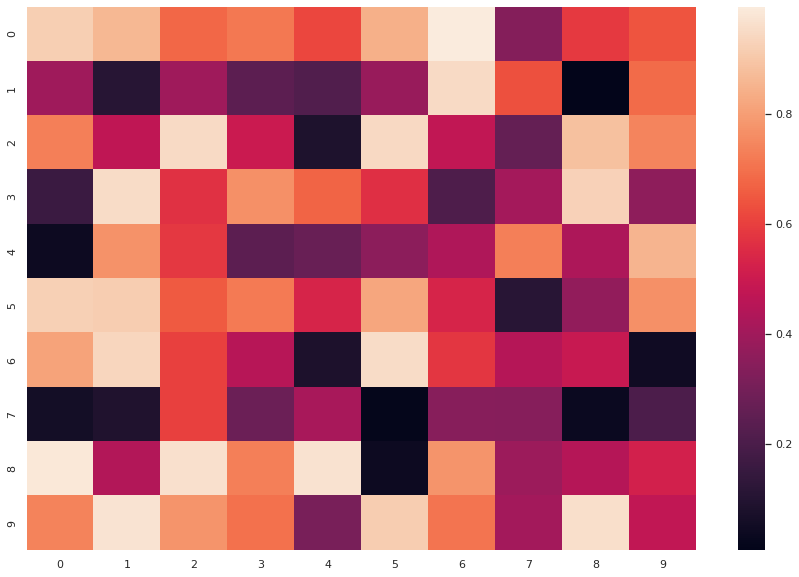

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(x)

In [ ]:
fl = sns.load_dataset('flights')

In [ ]:
fl.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

.

.

.

before we could plot this, we need to pivot the data as per the needs


index   year	month	passengers

0      	1949	Jan	     112

1	   1949	    Feb	     118

2	   1949	    Mar	      132


3	   1949	    Apr	     129

4	   1949   	May	     121


we want the above data in the form 

year   |  jan |  feb |  march  | april

1949  |    112 | 118  | 132     |  129   

1950


--------------

instead of using pivot table, which we used earlier, we'll use pivot function

In [ ]:
fl_ = fl.pivot(index='year', columns='month', values='passengers')

In [ ]:
fl_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1949 to 1960
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jan     12 non-null     int64
 1   Feb     12 non-null     int64
 2   Mar     12 non-null     int64
 3   Apr     12 non-null     int64
 4   May     12 non-null     int64
 5   Jun     12 non-null     int64
 6   Jul     12 non-null     int64
 7   Aug     12 non-null     int64
 8   Sep     12 non-null     int64
 9   Oct     12 non-null     int64
 10  Nov     12 non-null     int64
 11  Dec     12 non-null     int64
dtypes: int64(12)
memory usage: 1.2 KB


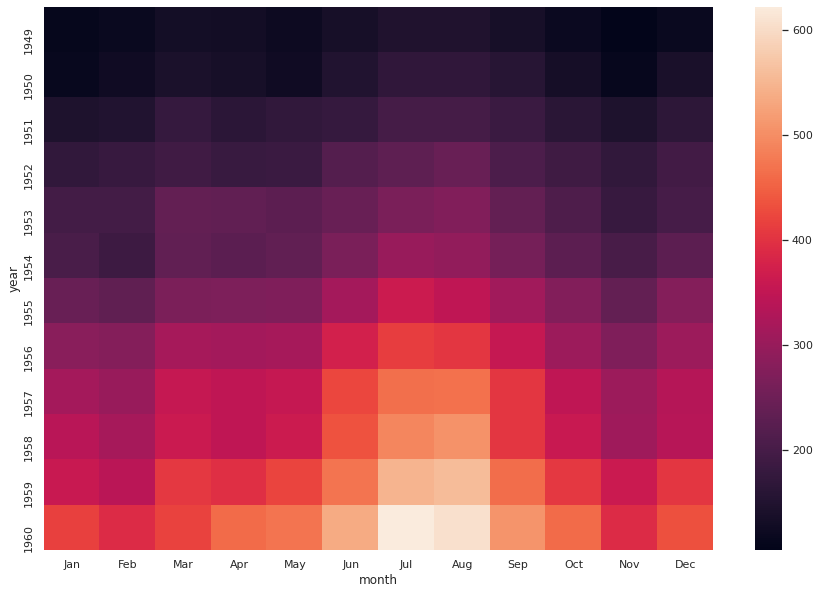

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(fl_)

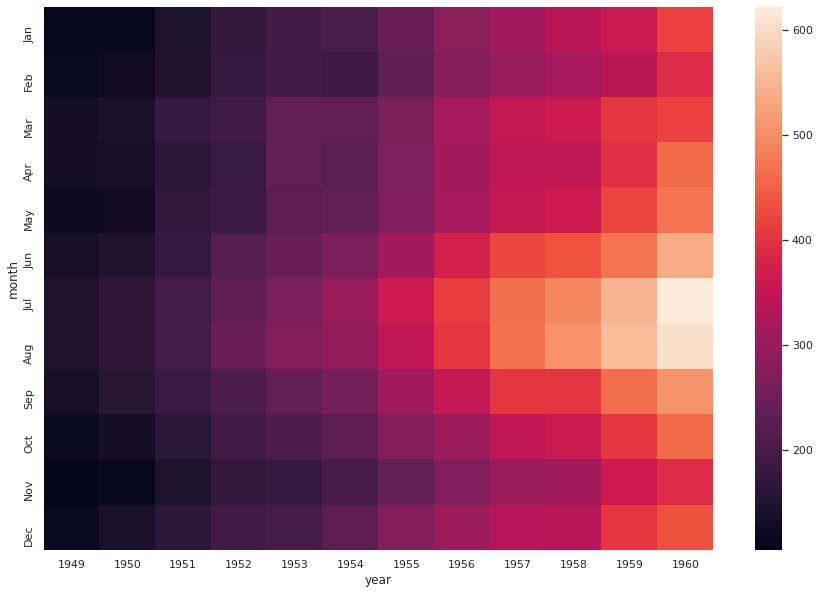

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(fl_.T)

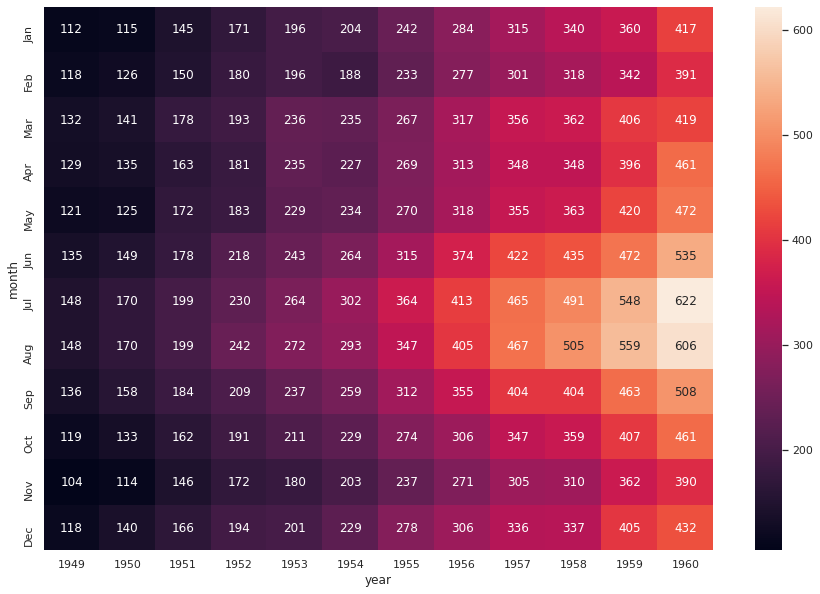

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(fl_.T, annot=True, fmt='d')

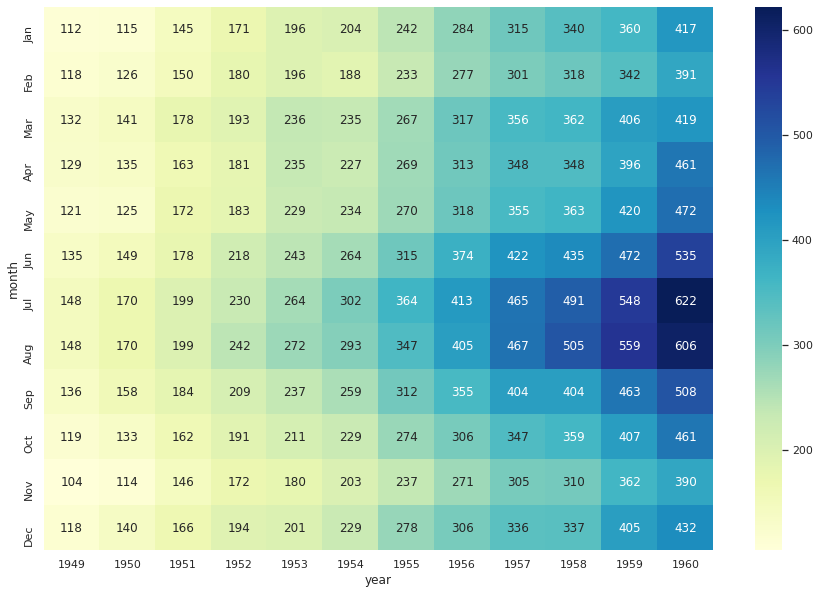

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap='YlGnBu')

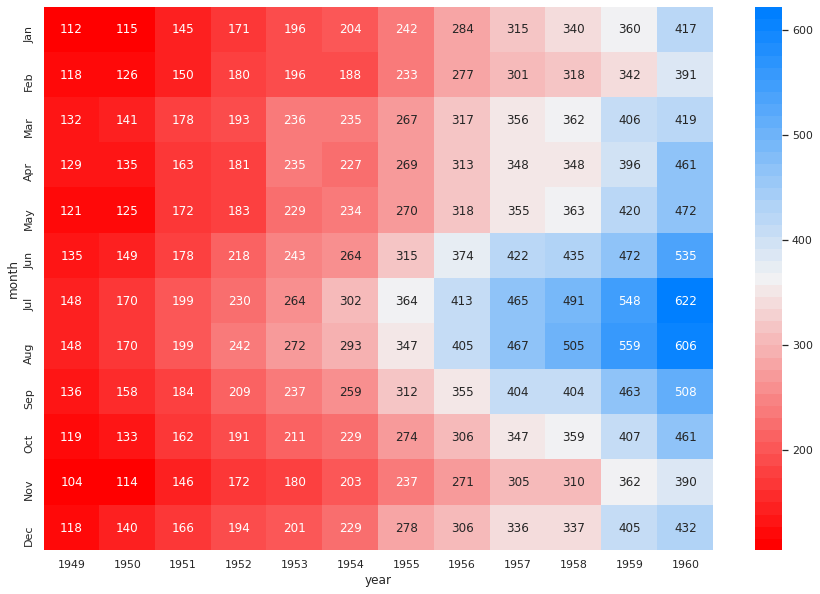

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(10, 250,s=200, n=45))

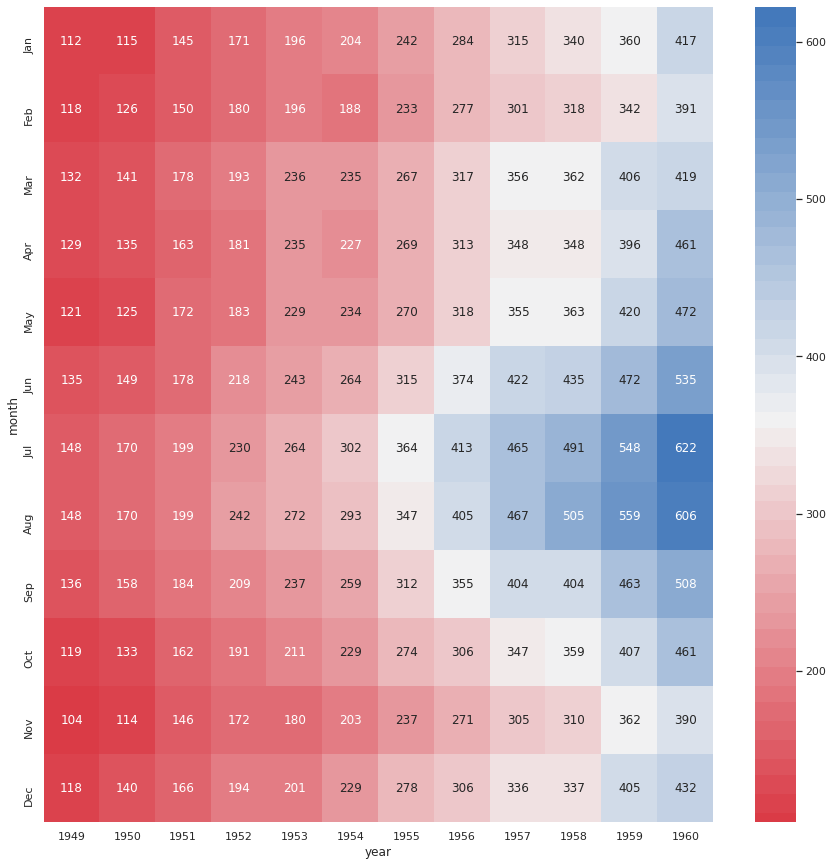

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(fl_.T, annot=True, fmt='d', cmap=sns.diverging_palette(10, 250, n=45), center=fl_.loc[1959, 'Jan'])

##Tasks on Open Ended Visualisation


http://ml-india.org/datasets/


-make questions and find answers

In [ ]:
df = pd.read_excel("train.xlsx")

In [ ]:
df.sample(10)

ID  Salary  ... openess_to_experience conscientiousness_rolling
869    223303  405000  ...               -0.2875                  0.087357
2537   353801  180000  ...               -0.7615                  0.001143
1352   210504  280000  ...                0.1864                 -0.107357
2509   716400  625000  ...               -0.4776                 -0.305857
791    391116  350000  ...               -0.6035                  0.344171
3134   831825  315000  ...               -3.3518                  0.031529
3189  1199988  100000  ...                0.8637                  0.492086
2503  1288243  360000  ...                0.6721                 -0.097386
1266   640413  180000  ...               -0.0943                  0.060100
3308   287976  250000  ...               -0.2875                 -0.096771

[10 rows x 39 columns]

####Random plots

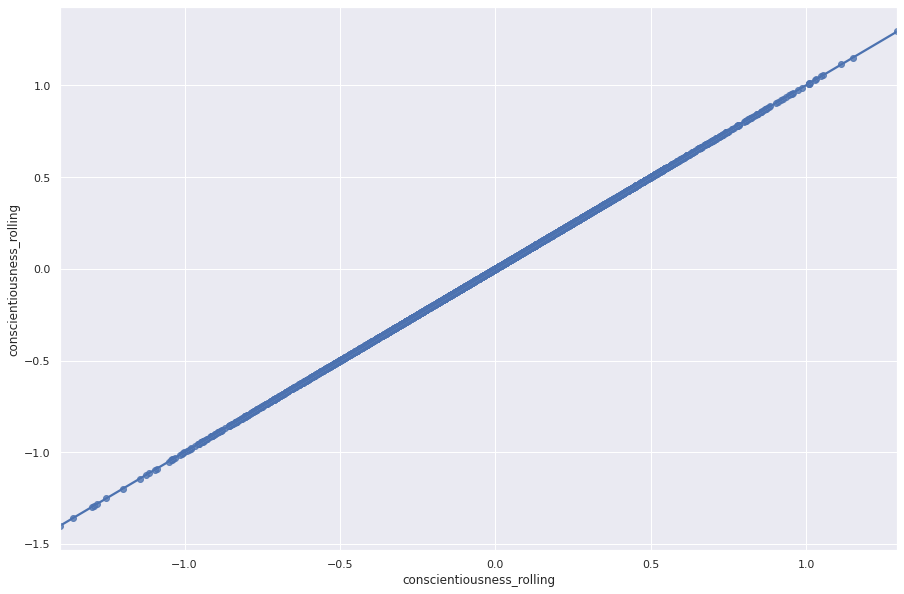

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.regplot(x='conscientiousness_rolling', y='conscientiousness_rolling', data= df, order=3)

####Changing the JobCity's case

In [ ]:
x = df.JobCity

In [ ]:
df.JobCity = df.loc[:, 'JobCity'].str.title()

In [ ]:
len(df.JobCity.unique())


262

In [ ]:
df.JobCity = df.JobCity.str.rstrip()

In [ ]:
len(df.JobCity.unique())

237

In [ ]:
df.JobCity = df.JobCity.str.lstrip()

In [ ]:
len(df.JobCity.unique())

232

In [ ]:
df.JobCity.unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', nan, 'Mohali',
       'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai',
       'New Delhi', 'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi',
       'Mysore', 'Rajkot', 'Greater Noida', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi Nagar',
       'Una', 'Daman And Diu', 'Gurgoan', 'Vsakhapttnam', 'Nagpur',
       'Bhagalpur', 'New Delhi - Jaisalmer', 'Ahmedabad', 'Kochi/Cochin',
       'Bankura', 'Bengaluru', 'Kanpur', 'Vijayawada', 'Kochi', 'Beawar',
       'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur',
       'Udaipur', 'Muzaffarpur', 'Kolkata`', 'Bulandshahar', 'Haridwar',
       'Raigarh', 'Visakhapatnam', 'Jabalpur', 'Unnao', 'Aurangabad',
       'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag', 'Nouda',
       'Dharams

####Q1

how does salary depend on the job city

In [ ]:
df["sal_range"] = pd.cut(x=df.Salary, bins=20, labels=False)

In [ ]:
df.drop('sal_range', axis=1, inplace=True)

In [ ]:
x

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

####Q2

college tier vs city tier

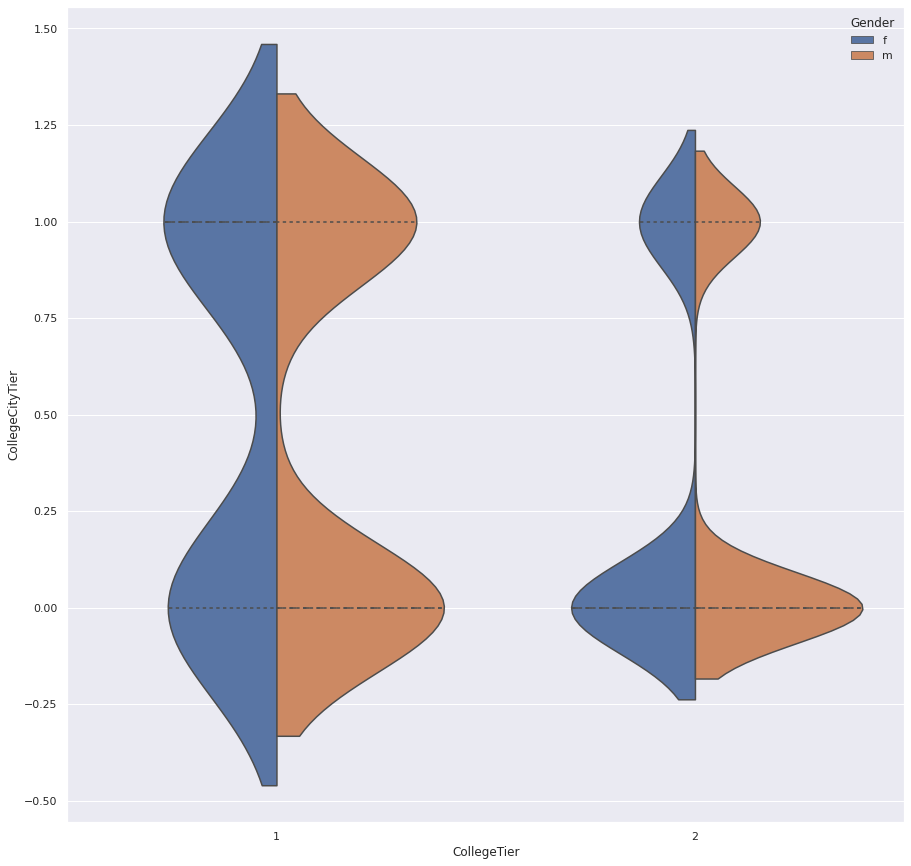

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,15)
sns.violinplot(x='CollegeTier', y='CollegeCityTier', data=df, split=True, hue='Gender', inner='quartiles')

#### Q3

how does conscientiousness depend on the college they graduated from

In [ ]:
df["conscientiousness_rolling"] = df.loc[:, 'conscientiousness'].rolling(7).mean()

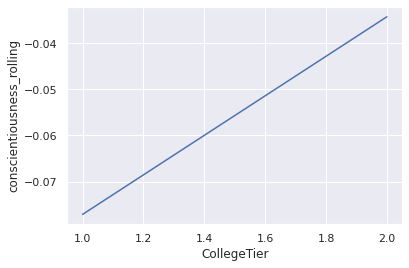

In [ ]:
sns.lineplot(x='CollegeTier', y='conscientiousness_rolling', data=df)

####Q4

Specialization vs salary

In [ ]:
len(df.Specialization.unique())

46

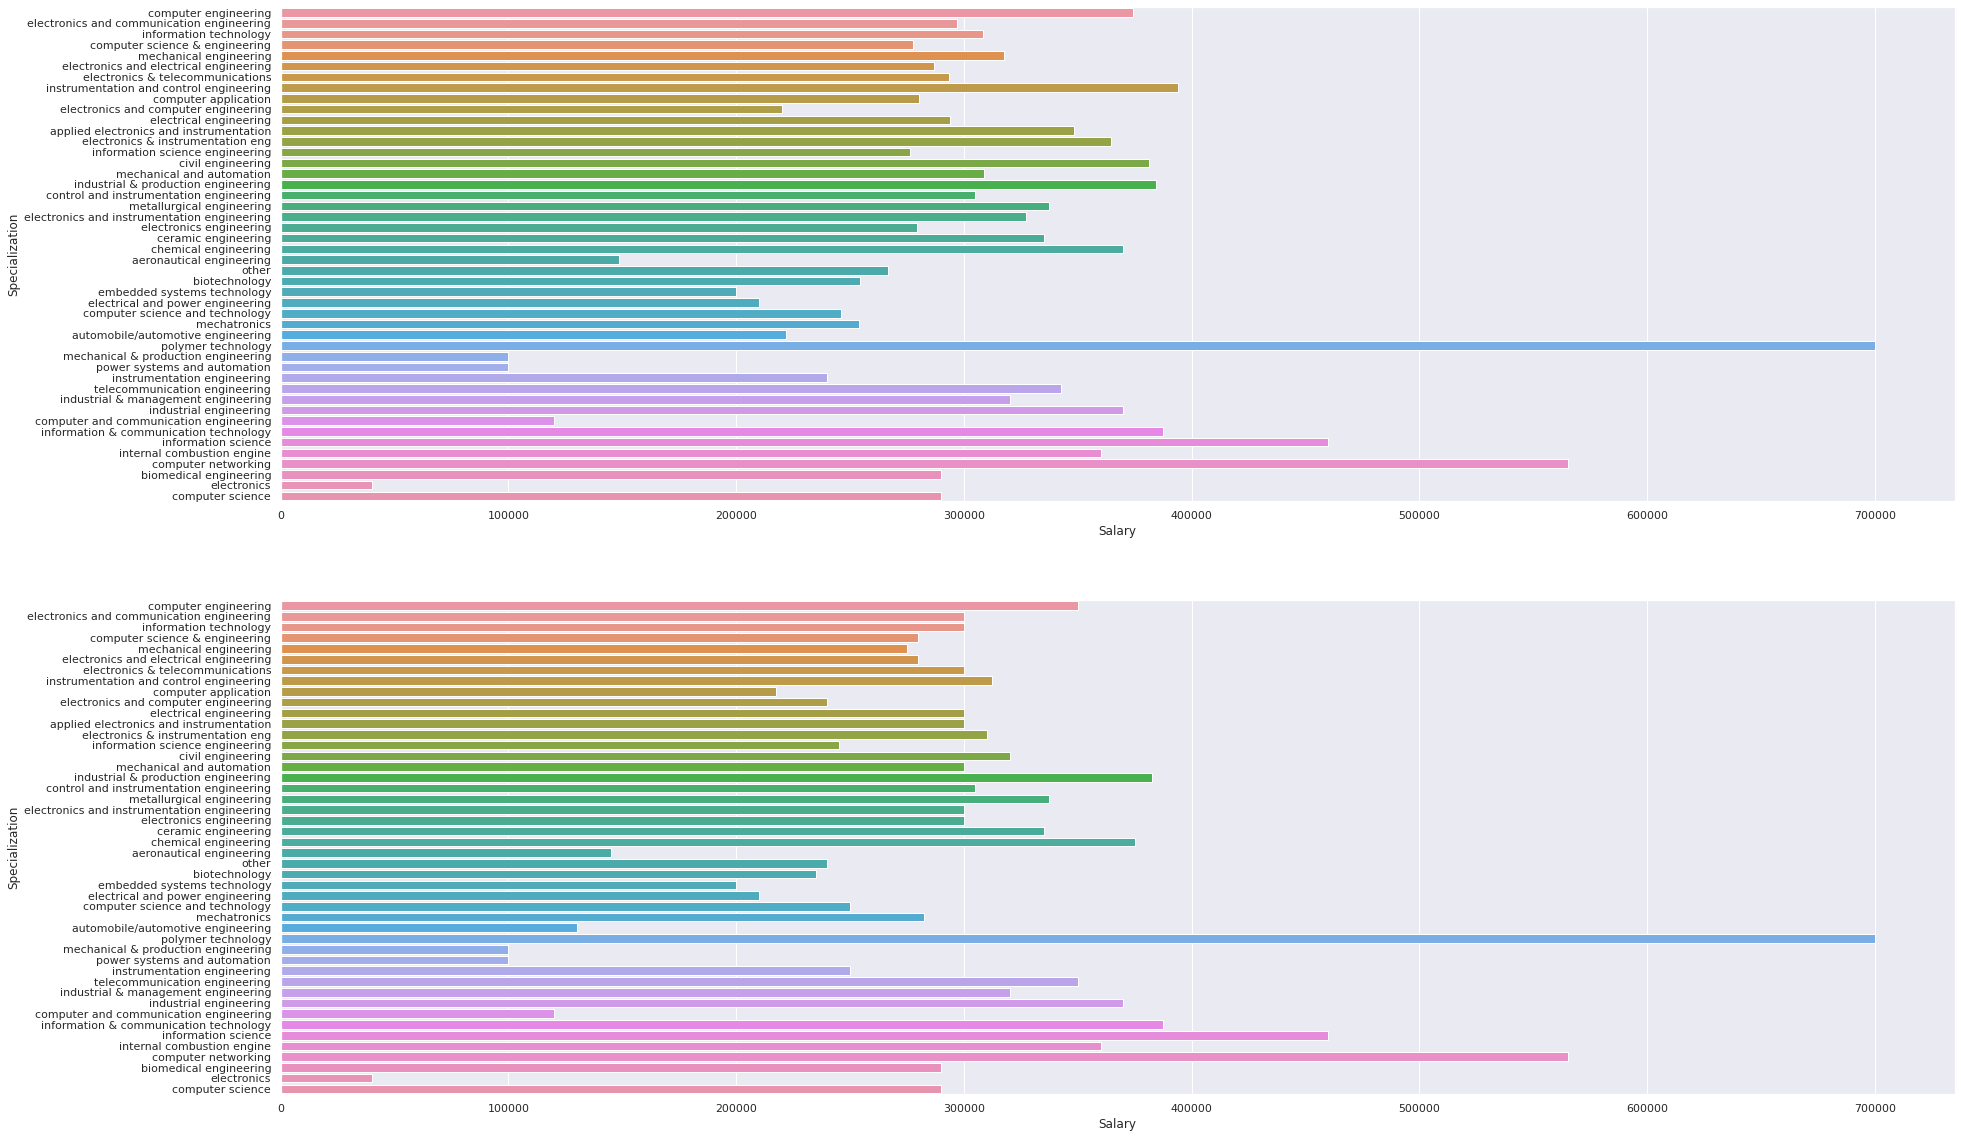

In [ ]:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(30,20)
sns.barplot(x='Salary', y='Specialization', data=df, ci=None, ax=axs[0])

sns.barplot(x='Salary', y='Specialization', data=df, estimator=np.median, ci=None, ax=axs[1])


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]), <a list of 9 Text major ticklabel objects>)

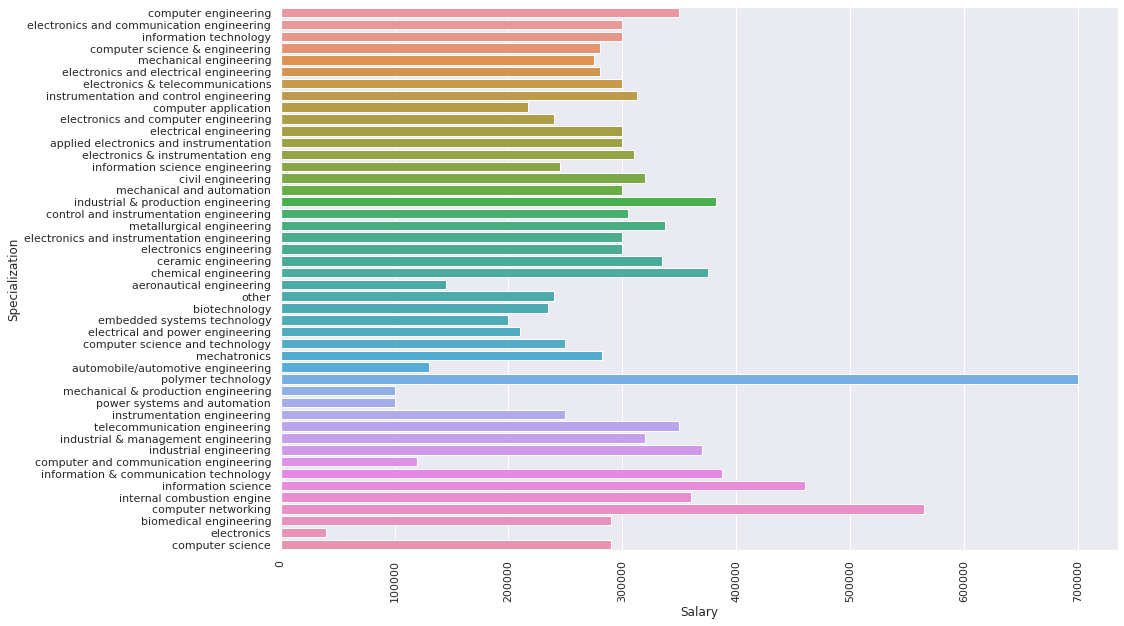

####q5

10th percentage vs gender

In [ ]:
len(df.CollegeState.unique())

26

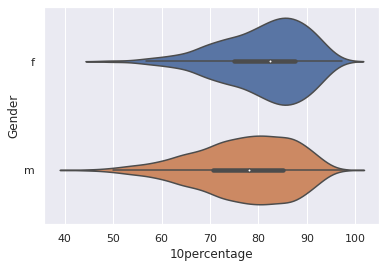

In [ ]:
sns.violinplot(x='10percentage', y='Gender', data=df)

####Q6

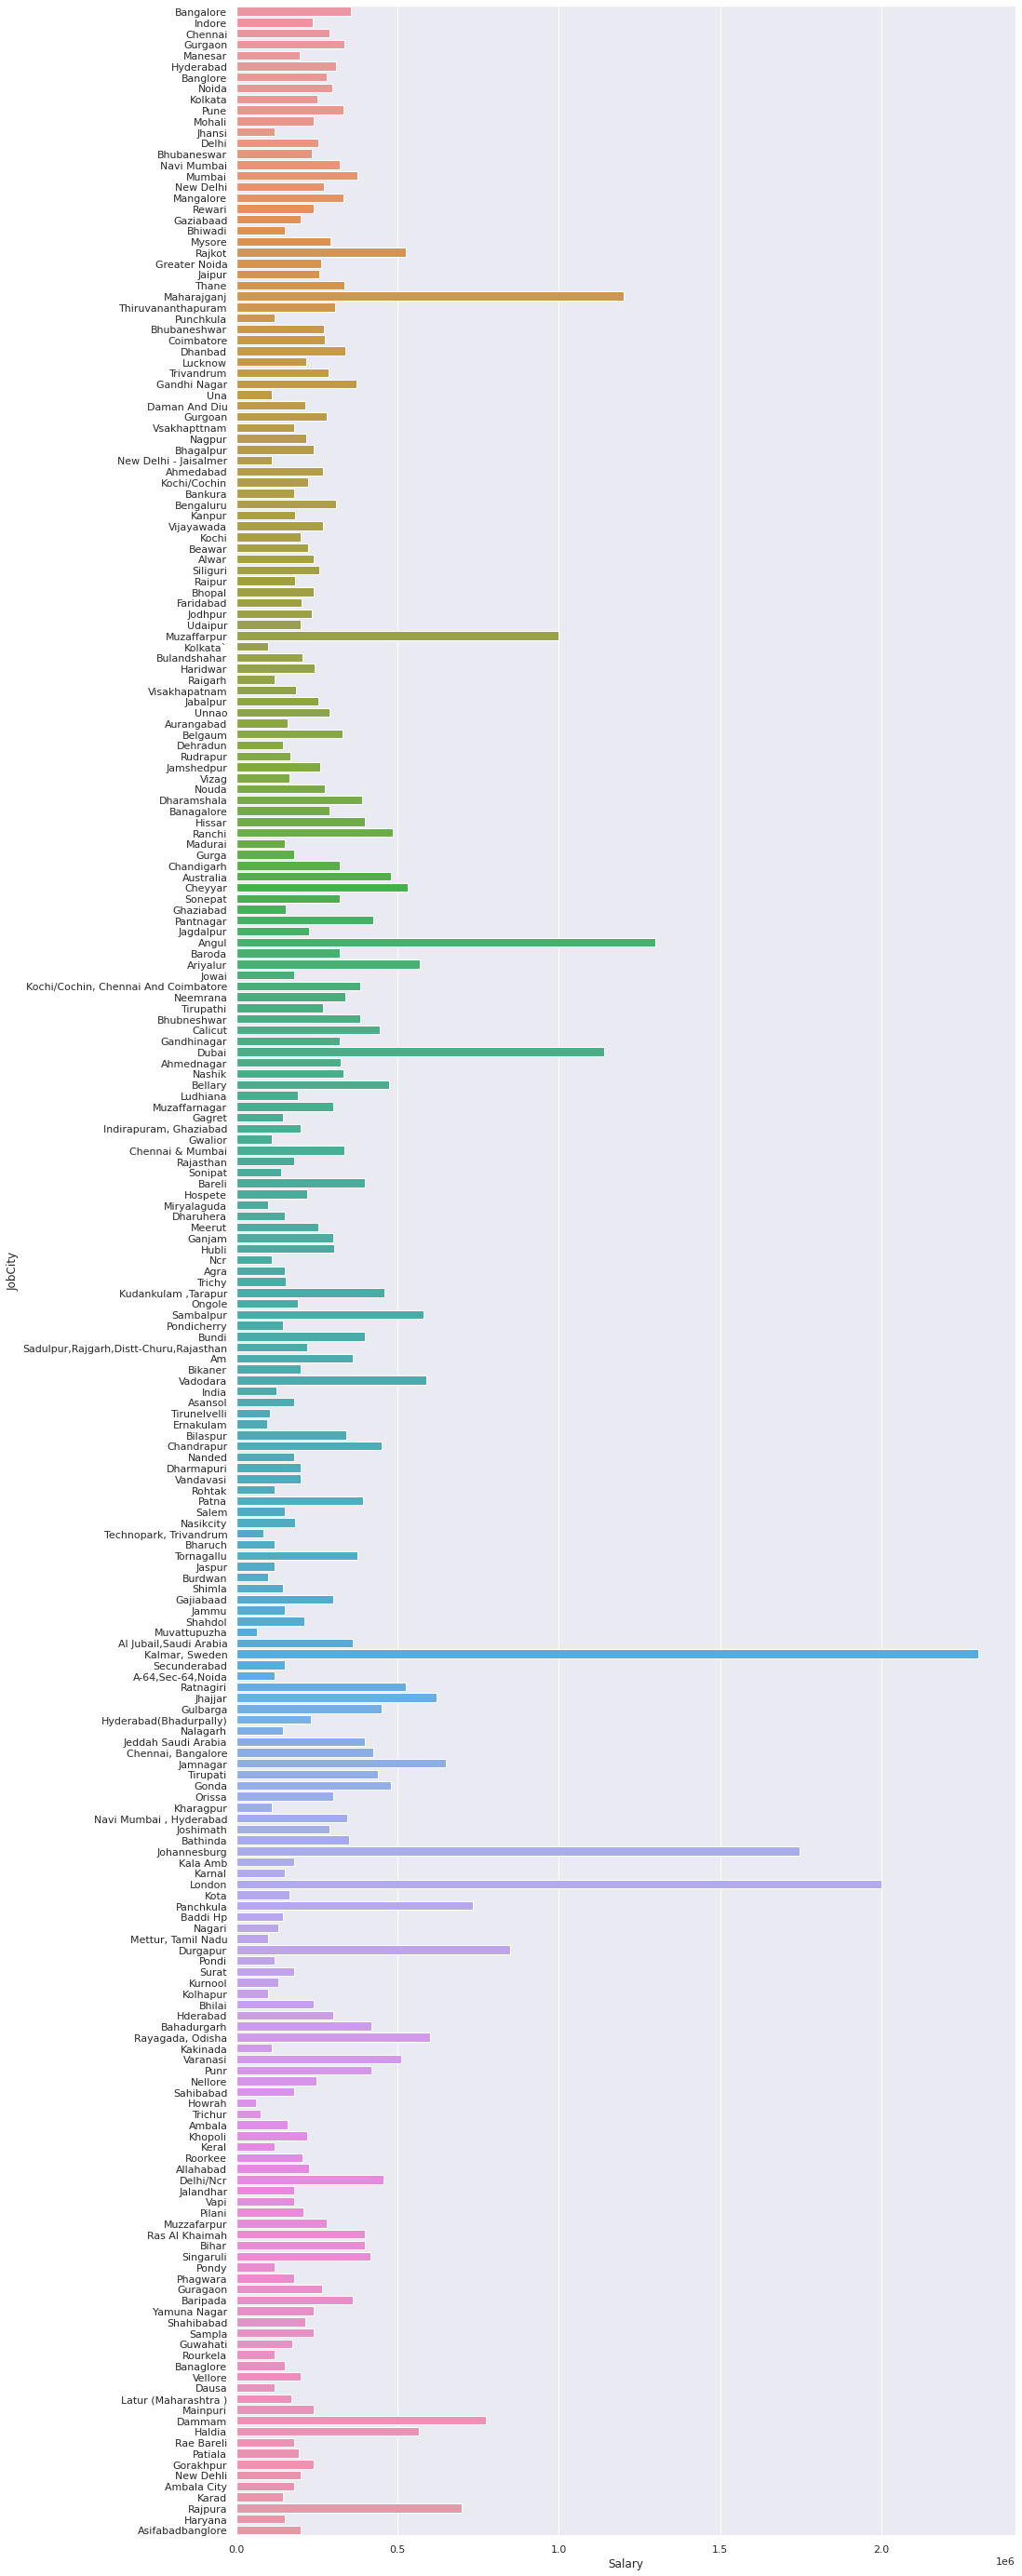

In [ ]:
fig = plt.gcf();
fig.set_size_inches(15,50);
sns.barplot(x='Salary', y='JobCity', data=df, ci=None);


#Aproaching Open Ended DS Problems

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use( 'seaborn-white')

##Handling missing values - numpy

In [ ]:
x = np.array([1,2,3,4,5])

In [ ]:
x.sum()

15

In [ ]:
x.mean()

3.0

In [ ]:
x = np.array([1,2,3,'--',5])

In [ ]:
x.mean()

TypeError: ignored

In [ ]:
x = np.array([1,2,3,None,5])

In [ ]:
x.mean()

TypeError: ignored

In [ ]:
x = np.array([1,2,3,np.nan,5])

In [ ]:
#Progress
x.mean()

In [ ]:
x_b = np.array([True,True,True,False,True])

In [ ]:
#we created another array, with T and F for all the values, and now we can do fancy indexing
#this way, we get the mean of the 4 terms, 1,2,3,5 and not 5
x[x_b].mean()

2.75

In [ ]:
#but we have an inbuilt function for this

#we call us masked array

#the 1 means, remove that element
#we dont have to make out own variables evvery single time
m_x = np.ma.masked_array(x, mask=[0,0,0,1,0])

In [ ]:
m_x.mean()

2.75

In [ ]:
#masking values, so that all the missing values marked -1 will we ignored while calculating the mean or any function
y = np.array([1 ,2,3,-1,5,-1,7,-1,8,9,10,11,12])
y_m = np.ma.masked_values(y, -1)

In [ ]:
y_m

masked_array(data=[1, 2, 3, --, 5, --, 7, --, 8, 9, 10, 11, 12],
             mask=[False, False, False,  True, False,  True, False,  True,
                   False, False, False, False, False],
       fill_value=-1)

In [ ]:
y_m.mean()

6.8

##Handling missing values with PANDAS

upload rooms.csv

.

.

.

In [ ]:
df = pd.read_csv("rooms.csv")

In [ ]:
df.head()

Room_Number Num_Students  Department Occupied
0        101.0            1  Mechanical        Y
1        102.0          NaN       Empty        N
2        103.0            3  Electrical        Y
3        104.0            2  Mechanical        Y
4        105.0          NaN    Chemical        N

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Room_Number   9 non-null      float64
 1   Num_Students  7 non-null      object 
 2   Department    10 non-null     object 
 3   Occupied      9 non-null      object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


###finding missing values

In [ ]:
df.isnull()

Room_Number  Num_Students  Department  Occupied
0        False         False       False     False
1        False          True       False     False
2        False         False       False     False
3        False         False       False     False
4        False          True       False     False
5         True         False       False     False
6        False         False       False     False
7        False          True       False     False
8        False         False       False      True
9        False         False       False     False

In [ ]:
df = pd.read_csv("rooms.csv", na_values=["na","Empty", "--"])

In [ ]:
df.isnull()

Room_Number  Num_Students  Department  Occupied
0        False         False       False     False
1        False          True        True     False
2        False         False       False     False
3        False         False       False     False
4        False          True       False     False
5         True         False       False     False
6        False         False       False      True
7        False          True       False     False
8        False          True       False      True
9        False         False       False     False

###filling missing values

[1]

filling a particular value onto each empty cell, using some decided conventions

In [ ]:
df.loc[:,"Occupied"].fillna("N", inplace=True)

In [ ]:
df

Room_Number  Num_Students  Department Occupied
0        101.0           1.0  Mechanical        Y
1        102.0           NaN         NaN        N
2        103.0           3.0  Electrical        Y
3        104.0           2.0  Mechanical        Y
4        105.0           NaN    Chemical        N
5          NaN           1.0  Electrical        Y
6        107.0           3.0       Civil        N
7        108.0           NaN          CS        Y
8        109.0           NaN  Mechanical        N
9        110.0           2.0          CS        N

In [ ]:
def ctb(x):
    if x=='Y':
        return True
    else:
        return False

df.Occupied = df.loc[:,"Occupied"].apply(ctb)

[2]

filling previous or next value onto the empty cell

In [ ]:
df["Dept2"]=df.Department

In [ ]:
df

Room_Number  Num_Students  Department  Occupied       Dept2
0        101.0           1.0  Mechanical      True  Mechanical
1        102.0           NaN         NaN     False         NaN
2        103.0           3.0  Electrical      True  Electrical
3        104.0           2.0  Mechanical      True  Mechanical
4        105.0           NaN    Chemical     False    Chemical
5          NaN           1.0  Electrical      True  Electrical
6        107.0           3.0       Civil     False       Civil
7        108.0           NaN          CS      True          CS
8        109.0           NaN  Mechanical     False  Mechanical
9        110.0           2.0          CS     False          CS

In [ ]:
#Forward fill. value of 1 is copied to 2
df.loc[:,"Department"].fillna(method='ffill', inplace=True)

In [ ]:
df

Room_Number  Num_Students  Department  Occupied       Dept2
0        101.0           1.0  Mechanical      True  Mechanical
1        102.0           NaN  Mechanical     False         NaN
2        103.0           3.0  Electrical      True  Electrical
3        104.0           2.0  Mechanical      True  Mechanical
4        105.0           NaN    Chemical     False    Chemical
5          NaN           1.0  Electrical      True  Electrical
6        107.0           3.0       Civil     False       Civil
7        108.0           NaN          CS      True          CS
8        109.0           NaN  Mechanical     False  Mechanical
9        110.0           2.0          CS     False          CS

In [ ]:
#Backward fill. value of 3 is copied to 2
df.loc[:,"Dept2"].fillna(method='bfill', inplace=True)

In [ ]:
df

Room_Number  Num_Students  Department  Occupied       Dept2
0        101.0           1.0  Mechanical      True  Mechanical
1        102.0           NaN  Mechanical     False  Electrical
2        103.0           3.0  Electrical      True  Electrical
3        104.0           2.0  Mechanical      True  Mechanical
4        105.0           NaN    Chemical     False    Chemical
5          NaN           1.0  Electrical      True  Electrical
6        107.0           3.0       Civil     False       Civil
7        108.0           NaN          CS      True          CS
8        109.0           NaN  Mechanical     False  Mechanical
9        110.0           2.0          CS     False          CS

[3]

filling mean or median

In [ ]:
df.loc[:, 'Num_Students'].fillna(df.loc[:, 'Num_Students'].median(), inplace=True)

In [ ]:
df

Room_Number  Num_Students  Department  Occupied       Dept2
0        101.0           1.0  Mechanical      True  Mechanical
1        102.0           2.0  Mechanical     False  Electrical
2        103.0           3.0  Electrical      True  Electrical
3        104.0           2.0  Mechanical      True  Mechanical
4        105.0           2.0    Chemical     False    Chemical
5          NaN           1.0  Electrical      True  Electrical
6        107.0           3.0       Civil     False       Civil
7        108.0           2.0          CS      True          CS
8        109.0           2.0  Mechanical     False  Mechanical
9        110.0           2.0          CS     False          CS

[4]

interpolating values

In [ ]:
df.Room_Number.interpolate(inplace=True)

In [ ]:
df

Room_Number  Num_Students  Department  Occupied       Dept2
0        101.0           1.0  Mechanical      True  Mechanical
1        102.0           2.0  Mechanical     False  Electrical
2        103.0           3.0  Electrical      True  Electrical
3        104.0           2.0  Mechanical      True  Mechanical
4        105.0           2.0    Chemical     False    Chemical
5        106.0           1.0  Electrical      True  Electrical
6        107.0           3.0       Civil     False       Civil
7        108.0           2.0          CS      True          CS
8        109.0           2.0  Mechanical     False  Mechanical
9        110.0           2.0          CS     False          CS

##AMEO Dataset case study

upload ameo.xlsx

.

.

.

In [ ]:
df = pd.read_excel("ameo.xlsx")

In [ ]:
df.head()

ID   Salary        DOJ  ... extraversion nueroticism openess_to_experience
0  203097   420000 2012-06-01  ...       0.5269     1.35490               -0.4455
1  579905   500000 2013-09-01  ...       1.2396    -0.10760                0.8637
2  810601   325000 2014-06-01  ...       0.1637    -0.86820                0.6721
3  267447  1100000 2011-07-01  ...      -0.3440    -0.40780               -0.9194
4  343523   200000 2014-03-01  ...      -1.0697     0.09163               -0.1295

[5 rows x 38 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

**A question one may ask is that...**

,



***I S   _  T H E    _ D A T A     _    B I A S E D***

**BASED ON THE GENDER**

In [ ]:
df.shape

(3998, 38)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

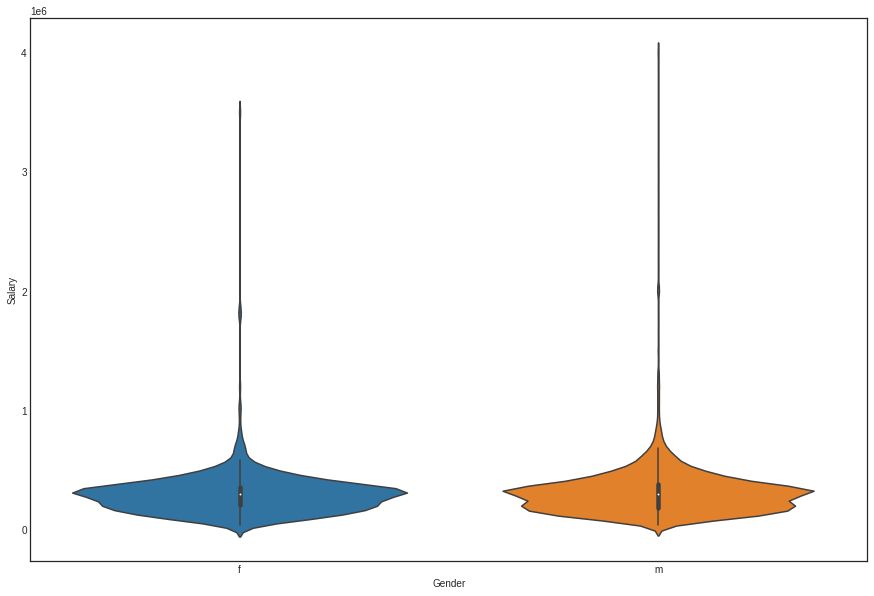

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.violinplot(x='Gender', y="Salary", data=df)

In [ ]:
df[["10percentage", '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

#GIrls score better

10percentage  12percentage  collegeGPA
Gender                                        
f          80.932894     77.007618   74.048056
m          76.979000     73.666636   70.679947

In [ ]:
df[["10percentage", '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()


10percentage  12percentage  collegeGPA
Gender                                        
f               82.4          77.0       74.00
m               78.0          73.4       70.66

In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Gender']].groupby('Gender').mean()

conscientiousness  agreeableness  ...  nueroticism  openess_to_experience
Gender                                    ...                                    
f                0.121034       0.292444  ...    -0.179358               0.038246
m               -0.087826       0.100566  ...    -0.165783              -0.193609

[2 rows x 5 columns]

In [ ]:
df[['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Gender']].groupby('Gender').median()

#girls perform better in big 5 personality test too

conscientiousness  agreeableness  ...  nueroticism  openess_to_experience
Gender                                    ...                                    
f                  0.2718         0.3789  ...     -0.23440                 0.0973
m                 -0.0154         0.2124  ...     -0.17277                -0.0943

[2 rows x 5 columns]

In [ ]:
#now,how is the salary distribution across each gender

df[['Salary', 'Gender']].groupby('Gender').mean()

#one may conclude and say females are getting less paid even though they perform better. but we need supporting answers

Salary
Gender               
f       294937.304075
m       311716.211772

In [ ]:
df[['Salary', 'Gender']].groupby('Gender').count()

#difference in the salary possibly because of this ratio difference

Salary
Gender        
f          957
m         3041

In [ ]:
#we defined a threshhold salary
th = df.Salary.mean() + df.Salary.std()

In [ ]:
df['HighIncome'] = (df.Salary > th)

In [ ]:
df.head()

ID   Salary        DOJ  ... nueroticism openess_to_experience HighIncome
0  203097   420000 2012-06-01  ...     1.35490               -0.4455      False
1  579905   500000 2013-09-01  ...    -0.10760                0.8637      False
2  810601   325000 2014-06-01  ...    -0.86820                0.6721      False
3  267447  1100000 2011-07-01  ...    -0.40780               -0.9194       True
4  343523   200000 2014-03-01  ...     0.09163               -0.1295      False

[5 rows x 39 columns]

In [ ]:
df[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome','Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [ ]:
df[['Salary', 'HighIncome', 'Gender']].groupby(['HighIncome','Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [ ]:
print("low income female salary % = ", (917/(2809+917))*100)

low income female salary % =  24.610842726784757


In [ ]:
print("High income female salary % = ", (40/(232+40))*100)

High income female salary % =  14.705882352941178


**inference** - 


there's a big drop of 10% in the females working in the higher income range, we must addess this to the company. But, we can dig deeper

also, we can notice that there is not a big difference in the same range salary, infact, females are being paid more than the males, in the higher income category

we must also, find some supporting data, for this drop.

does this percentage depends on some other factors like college tier, city, etc

In [ ]:
df[['Salary', 'HighIncome', 'CollegeTier']].groupby(['HighIncome','CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [ ]:
print("low income college 2 tier % is = ", 3492/(3492+234) * 100 )

low income college 2 tier % is =  93.71980676328504


In [ ]:
print("High income college 2 tier % is = ", 209/(209+63) * 100 )

High income college 2 tier % is =  76.83823529411765


we infer that college tier plays a role in deciding the high income

college tier 2 students get less paid as compared to college 1 tier students

In [ ]:
df[['Gender', 'Salary', 'CollegeTier']].groupby(['CollegeTier', 'Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [ ]:
print("In college tier 1, female % is = ", 51/(246+51)*100)

In college tier 1, female % is =  17.17171717171717


In [ ]:
print("In college tier 2, female % is = ", 906/(906+2795)*100)

In college tier 2, female % is =  24.479870305322883


we infer that less no, of females go to college tier 1

they are mainly situated in college tier 2, which in turn means that they dont get quality education, and hence get less paid.

##Agricultural Data

upload apy.csv

.

.

.

###Basics

In [ ]:
df = pd.read_csv("apy.csv")

In [ ]:
df.head()

State_Name District_Name  ...    Area Production
0  Andaman and Nicobar Islands      NICOBARS  ...  1254.0       2000
1  Andaman and Nicobar Islands      NICOBARS  ...     2.0          1
2  Andaman and Nicobar Islands      NICOBARS  ...   102.0        321
3  Andaman and Nicobar Islands      NICOBARS  ...   176.0        641
4  Andaman and Nicobar Islands      NICOBARS  ...   720.0        165

[5 rows x 7 columns]

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 13.1+ MB


In [ ]:
#this will give us an idea of the na value
pd.to_numeric(df.Production)

ValueError: ignored

In [ ]:
df = pd.read_csv("apy.csv", na_values="=")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.dropna(inplace=True)

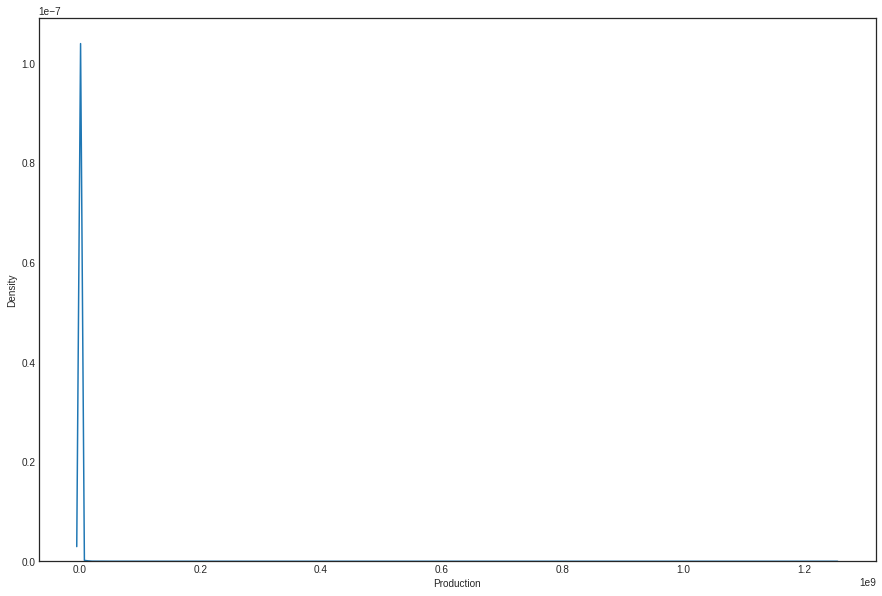

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.kdeplot(x='Production', data=df)

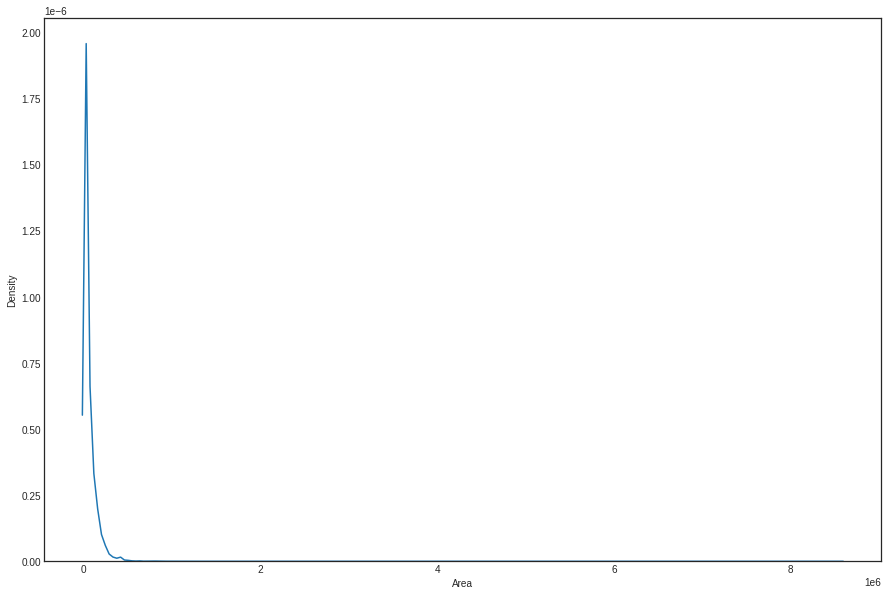

In [ ]:
    fig = plt.gcf()
fig.set_size_inches(15,10)
sns.kdeplot(x='Area', data=df)

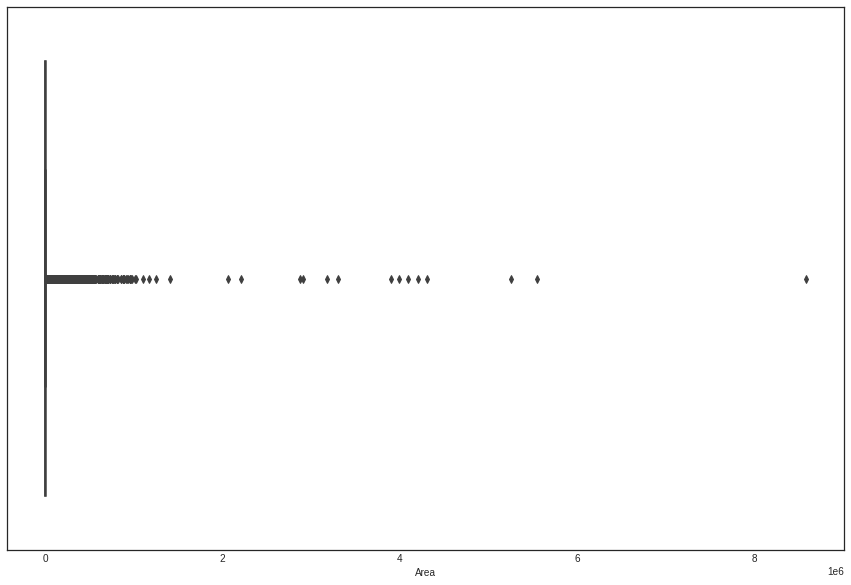

In [ ]:
    fig = plt.gcf()
fig.set_size_inches(15,10)
sns.boxplot(x='Area', data=df)

we dont care about the district, so we want a dataframe of years, states, production, area

In [ ]:
df[df.State_Name == 'Karnataka']['District_Name'].unique()

array(['BAGALKOT', 'BANGALORE RURAL', 'BELGAUM', 'BELLARY',
       'BENGALURU URBAN', 'BIDAR', 'BIJAPUR', 'CHAMARAJANAGAR',
       'CHIKBALLAPUR', 'CHIKMAGALUR', 'CHITRADURGA', 'DAKSHIN KANNAD',
       'DAVANGERE', 'DHARWAD', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE', 'RAICHUR',
       'RAMANAGARA', 'SHIMOGA', 'TUMKUR', 'UDUPI', 'UTTAR KANNAD',
       'YADGIR'], dtype=object)

In [ ]:
#we dont care about the districts. so we drop them from our data
df.groupby(['State_Name','Crop','Crop_Year']).sum()

Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [ ]:
#lets say we dont care about the crop either, we want just the total state production
df_ = df.groupby(['State_Name','Crop_Year']).sum()

In [ ]:
df_.reset_index(inplace=True)

In [ ]:
df_

State_Name  Crop_Year        Area   Production
0    Andaman and Nicobar Islands       2000    44518.00  89060914.00
1    Andaman and Nicobar Islands       2001    41163.00  89718700.00
2    Andaman and Nicobar Islands       2002    45231.40  94387137.67
3    Andaman and Nicobar Islands       2003    44799.40  95296454.67
4    Andaman and Nicobar Islands       2004    45308.77  87186497.63
..                           ...        ...         ...          ...
514                  West Bengal       2010  7246875.00  38308645.00
515                  West Bengal       2011  7755360.00  36777774.00
516                  West Bengal       2012  7850936.00  38918275.00
517                  West Bengal       2013  7999815.00  37901281.00
518                  West Bengal       2014  8058390.00  43584403.00

[519 rows x 4 columns]

In [ ]:
df_[['State_Name', 'Crop_Year']].groupby('State_Name').count()

Crop_Year
State_Name                            
Andaman and Nicobar Islands          8
Andhra Pradesh                      18
Arunachal Pradesh                   18
Assam                               18
Bihar                               18
Chandigarh                          13
Chhattisgarh                        15
Dadra and Nagar Haveli              17
Goa                                 12
Gujarat                             16
Haryana                             16
Himachal Pradesh                    12
Jammu and Kashmir                   12
Jharkhand                            7
Karnataka                           18
Kerala                              18
Madhya Pradesh                      17
Maharashtra                         18
Manipur                             11
Meghalaya                           18
Mizoram                             13
Nagaland                            18
Odisha                              19
Puducherry                          17
Punjab                              18
Rajasthan                           14
Sikkim                              18
Tamil Nadu                          17
Telangana                           17
Tripura                             17
Uttar Pradesh                       18
Uttarakhand                         15
West Bengal                         18

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


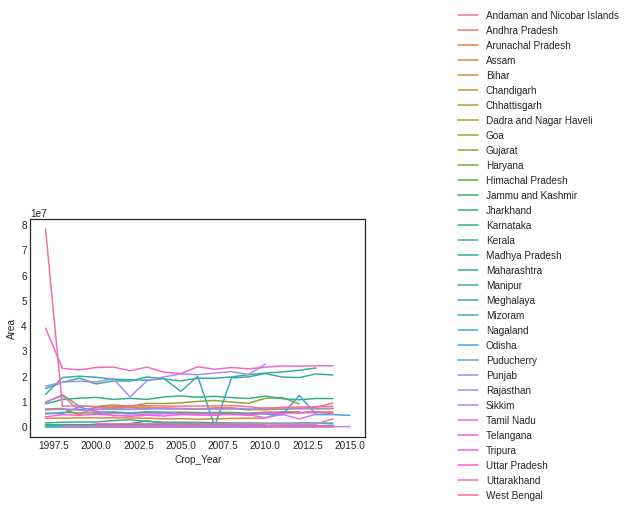

In [ ]:
sns.lineplot('Crop_Year', 'Area', data=df_, hue='State_Name')
plt.legend(bbox_to_anchor=(1.25,2))

###Plotly express

installation and working with it

In [ ]:
!pip3 install plotly_express

In [ ]:
import plotly_express as px

In [ ]:
df_copy = df_.copy()

AttributeError: ignored

In [ ]:
px.scatter(data_frame=df_copy.sort_values(by='Crop_Year',axis=0), x='Area', y='Production', 
           animation_frame='Crop_Year',
           animation_group = 'State_Name',
           color='State_Name')

.

.

some values are outstanding from the normal plot, so we can select a few crops and plot the animated scatterplot for them, for better visualisation

we can take the main crops, for instance


kerela's production is high because coconuts are heavy crops, and they act as an outlier to the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242364 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242364 non-null  object 
 1   District_Name  242364 non-null  object 
 2   Crop_Year      242364 non-null  int64  
 3   Season         242364 non-null  object 
 4   Crop           242364 non-null  object 
 5   Area           242364 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [ ]:
df[(df.Crop.isin(['Rice', 'Maize', 'Wheat', 'Ragi']))]

State_Name District_Name  ...       Area Production
2       Andaman and Nicobar Islands      NICOBARS  ...     102.00     321.00
12      Andaman and Nicobar Islands      NICOBARS  ...      83.00     300.00
18      Andaman and Nicobar Islands      NICOBARS  ...     189.20     510.84
27      Andaman and Nicobar Islands      NICOBARS  ...      52.00      90.17
36      Andaman and Nicobar Islands      NICOBARS  ...      52.94      72.57
...                             ...           ...  ...        ...        ...
246058                  West Bengal       PURULIA  ...     264.00     721.00
246084                  West Bengal       PURULIA  ...    1622.00    3663.00
246085                  West Bengal       PURULIA  ...     325.00    2039.00
246086                  West Bengal       PURULIA  ...     306.00     801.00
246089                  West Bengal       PURULIA  ...  279151.00  597899.00

[40863 rows x 7 columns]

In [ ]:
df_ = df[(df.Crop.isin(['Rice', 'Maize', 'Wheat', 'Ragi']))].groupby(['State_Name', "Crop_Year"]).sum()

In [ ]:
df_.reset_index(inplace=True)

In [ ]:
df_

State_Name  Crop_Year        Area   Production
0    Andaman and Nicobar Islands       2000    10881.00     32184.00
1    Andaman and Nicobar Islands       2001     9801.00     27333.00
2    Andaman and Nicobar Islands       2002    10885.00     32111.66
3    Andaman and Nicobar Islands       2003    10561.37     30850.87
4    Andaman and Nicobar Islands       2004    10734.92     29192.23
..                           ...        ...         ...          ...
513                  West Bengal       2010  5361309.00  14630175.00
514                  West Bengal       2011  5855620.00  15851031.00
515                  West Bengal       2012  5898997.00  16315137.00
516                  West Bengal       2013  5999179.00  16936255.00
517                  West Bengal       2014  6023075.00  17527428.00

[518 rows x 4 columns]

In [ ]:
px.scatter(data_frame=df_, x='Area', y='Production', 
           animation_frame='Crop_Year',
           animation_group = 'State_Name',
           color='State_Name')

In [ ]:
df_

State_Name  Crop_Year        Area   Production
0    Andaman and Nicobar Islands       2000    10881.00     32184.00
1    Andaman and Nicobar Islands       2001     9801.00     27333.00
2    Andaman and Nicobar Islands       2002    10885.00     32111.66
3    Andaman and Nicobar Islands       2003    10561.37     30850.87
4    Andaman and Nicobar Islands       2004    10734.92     29192.23
..                           ...        ...         ...          ...
513                  West Bengal       2010  5361309.00  14630175.00
514                  West Bengal       2011  5855620.00  15851031.00
515                  West Bengal       2012  5898997.00  16315137.00
516                  West Bengal       2013  5999179.00  16936255.00
517                  West Bengal       2014  6023075.00  17527428.00

[518 rows x 4 columns]

In [ ]:
df_["Efficiency"] = df_["Production"]/df_['Area']

In [ ]:
df_

State_Name  Crop_Year  ...   Production  Efficiency
0    Andaman and Nicobar Islands       2000  ...     32184.00    2.957816
1    Andaman and Nicobar Islands       2001  ...     27333.00    2.788797
2    Andaman and Nicobar Islands       2002  ...     32111.66    2.950084
3    Andaman and Nicobar Islands       2003  ...     30850.87    2.921105
4    Andaman and Nicobar Islands       2004  ...     29192.23    2.719371
..                           ...        ...  ...          ...         ...
513                  West Bengal       2010  ...  14630175.00    2.728844
514                  West Bengal       2011  ...  15851031.00    2.706977
515                  West Bengal       2012  ...  16315137.00    2.765748
516                  West Bengal       2013  ...  16936255.00    2.823095
517                  West Bengal       2014  ...  17527428.00    2.910046

[518 rows x 5 columns]

In [ ]:
#now we can plot our same plot, but b/w area and efficiency and can set bubble size with production

px.scatter(data_frame=df_.sort_values("Crop_Year"), x='Area', y='Efficiency',
           size='Production',
           animation_frame='Crop_Year',
           animation_group = 'State_Name',
           color='State_Name',
           range_y=[0.75, 6],
           range_x=[-1E6, 20E6]
           )

#Inferential Statistics

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use( 'dark_background')

import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
def nCr(n,r):
    f = math.factorial
    return f(n)/(f(n-r)*f(r))


In [ ]:
nd = np.random.normal(loc=2, scale=1,size=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


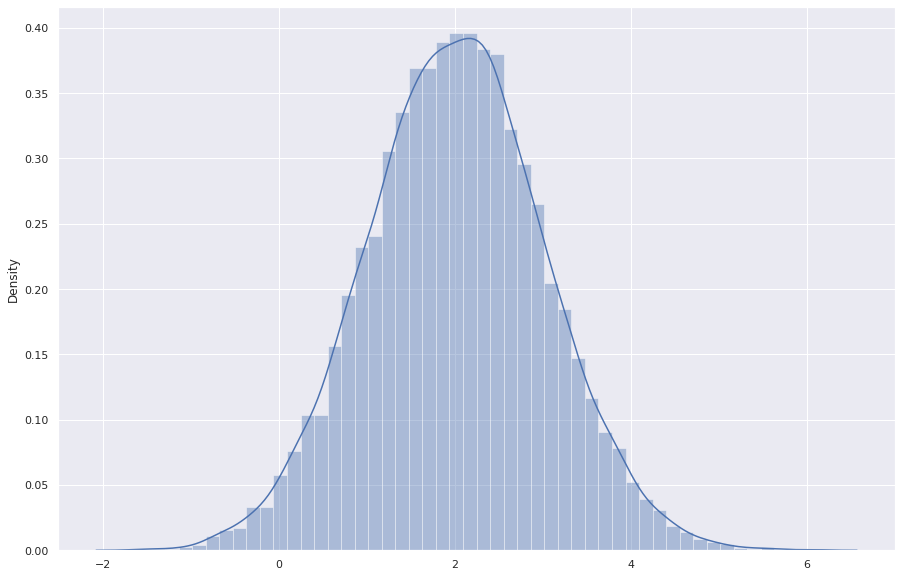

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(nd, kde=True)

In [ ]:
dice1 = np.random.randint(1,7, 100, dtype=int)
dice2 = np.random.randint(1,7, 100, dtype=int)
sum = np.array([])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


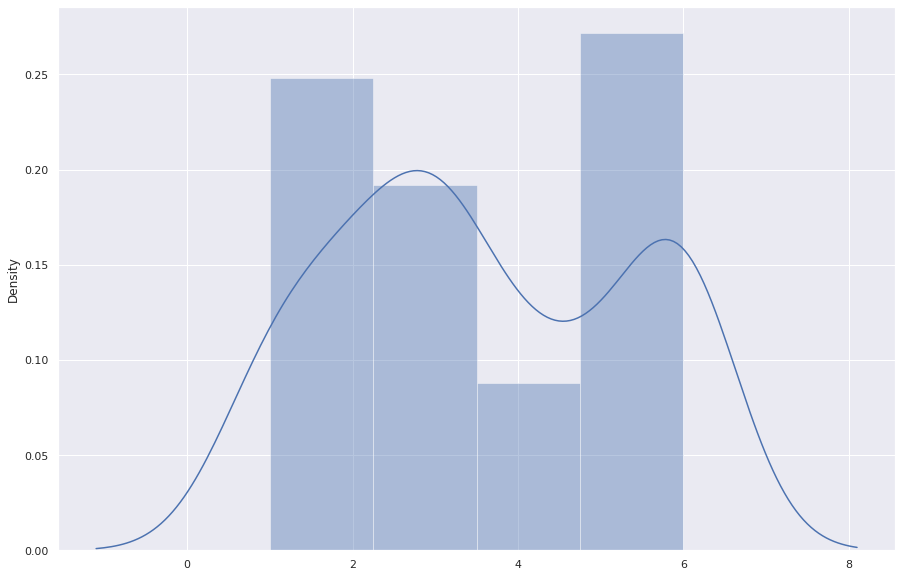

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(dice, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


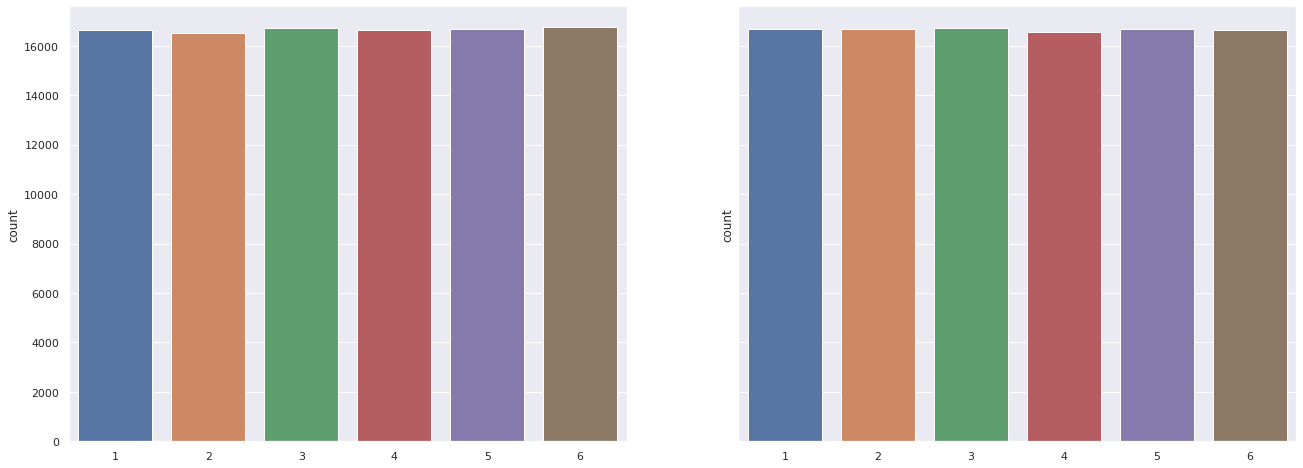

In [ ]:
np.random.seed(1)
d1 = np.array([1, 2, 3, 4, 5, 6])
d2 = np.array([1, 2, 3, 4, 5, 6])
dice_1 = []
dice_2 = []
sums = []
for _ in range(100000):  
  roll_1 = np.random.choice(d1)
  roll_2 = np.random.choice(d2)
  dice_1.append(roll_1)
  dice_2.append(roll_2)
  sums.append(roll_1 + roll_2)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(22,8))
sns.countplot(dice_1, ax=ax1)
sns.countplot(dice_2, ax=ax2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


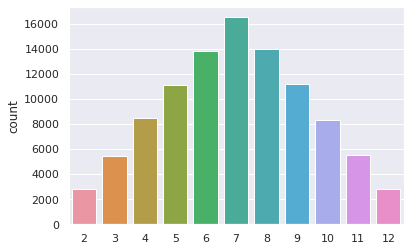

In [ ]:
sns.countplot(sums)

In [ ]:
print("\t",np.mean(dice_1), "\n\n\t", np.mean(dice_2))

	 3.50463 

	 3.49755


In [ ]:
#my way
np.random.seed(1)
d1 = np.array([1,2,3,4,5,6])
d2 = np.array([1,2,3,4,5,6])
dice1 = np.a rray([])
dice2 = np.array([])
sum = np.array([])

for i in range(100000):
    d1roll = np.random.choice(d1)
    d2roll = np.random.choice(d2)
    dice1 = np.append(dice1, d1roll)
    dice2 = np.append(dice2, d2roll)
    sum = np.append(sum, d1roll+d2roll)

print("mean of dice 1 outcomes :\t", np.mean(dice1))
print("mean of dice 2 outcomes :\t", np.mean(dice2))
print("mean of sum of outcomes :\t", np.mean(sum))

mean of dice 1 outcomes :	 3.50463
mean of dice 2 outcomes :	 3.49755
mean of sum of outcomes :	 7.00218


In [ ]:
np.append(dice1, d1roll)

array([5.])

In [ ]:
dice1

array([6., 5., 2., ..., 1., 2., 5.])

question -

X_ = avg of n throws of a die

compute variance of X_ of 1000 samples
change n and recomute. plot variance vs n

In [ ]:
d1 = np.array([1,2,3,4,5,6])
dice1 = np.array([])
mean_arr = np.array([])
var_arr = np.array([])
for i in range(1000):
    d1roll = np.random.choice(d1)
    dice1 = np.append(dice1, d1roll)
    mean = np.mean(dice1)
    mean_arr = np.append(mean_arr, mean)
    var = np.var(mean_arr)
    var_arr = np.append(var_arr, var)
print(np.mean(var_arr))

0.027480513012567508


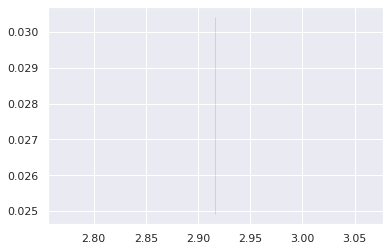

In [ ]:
sns.lineplot(y = var_arr, x = np.var(d1))

1000

#CLT

plot the dist. of sum of n IID samples from dist D

n = 10,100,1000,10000
D = uniform, binomial, discrete, normal

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use( 'dark_background')

import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
#BINOMIAL DIST
pop = np.random.binomial(1000, 0.3, (1*1000))

In [ ]:
def sample():
    a = np.array([])
    a = np.append(a, np.random.choice(pop, 100))
    return a
a_mean = np.array([])
for i in range(10000):
    a = sample()
    a_mean = np.append(a_mean, np.mean(a))
np.mean(a_mean)


299.620924

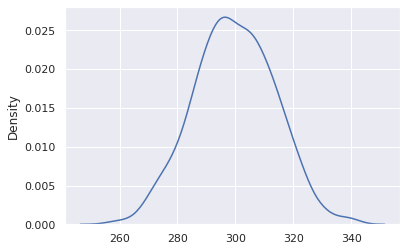

In [ ]:
sns.kdeplot(pop)

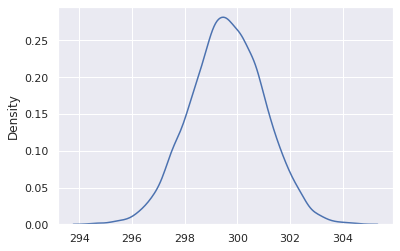

In [ ]:
sns.kdeplot(a_mean)

In [ ]:
#UNIFORM DIST

pop = np.random.uniform(0, 1000, (1*1000))

no of samples

no of elements in a sample

In [ ]:
np.random.seed(1)
def sample():
    a = np.array([])
    a = np.append(a, np.random.choice(pop, 20))
    #this is no. sample size, no. of elements in a sample
    return a
a_mean = np.array([])
for i in range(300):
    #this is no. of samples
    a = sample()
    a_mean = np.append(a_mean, np.mean(a))
print(np.mean(a_mean))
print(np.mean(pop))

515.0457003432913
512.6599331186208


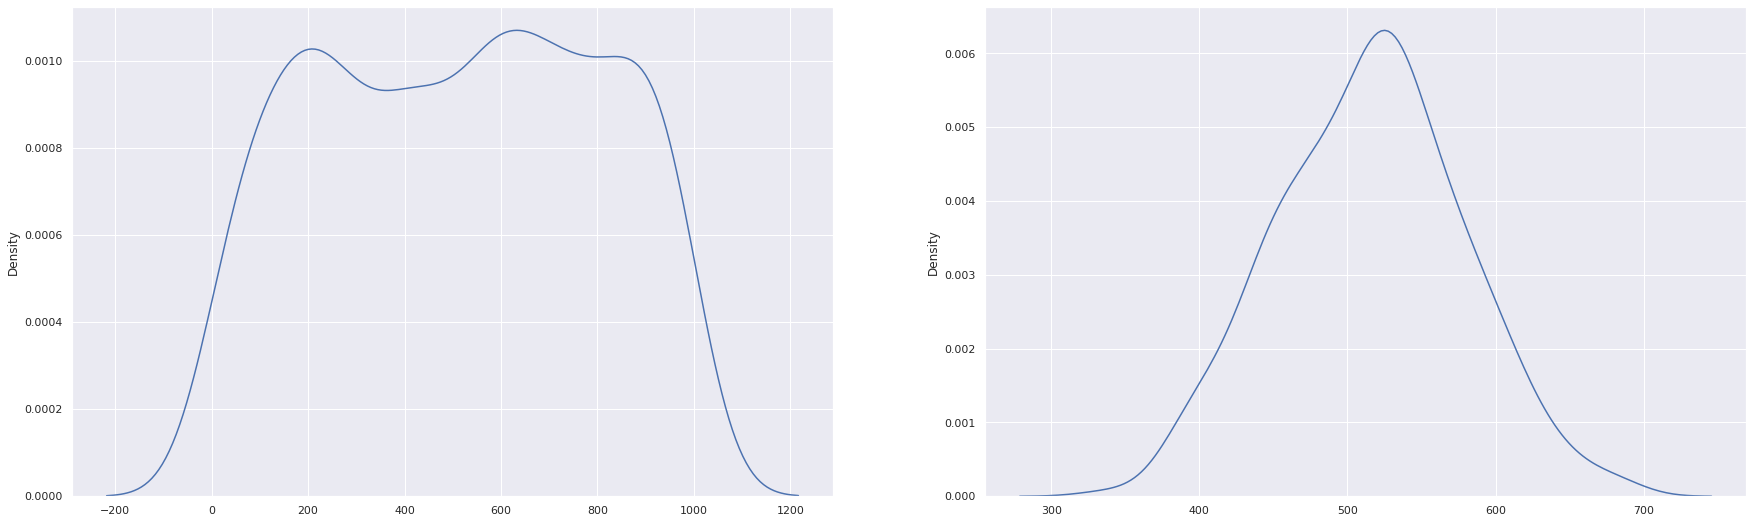

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(30, 9)

sns.kdeplot(pop, ax=axs[0])
sns.kdeplot(a_mean, ax=axs[1])

In [ ]:
#die example

pop = np.array([1,2,3,4,5,6])

#np.random.seed(2)
def sample():
    a = np.array([])
    a = np.append(a, np.random.choice(pop, 10))
    #this is no. sample size, no. of elements in a sample
    return a
a_mean = np.array([])
for i in range(2):
    #this is no. of samples
    a = sample()
    a_mean = np.append(a_mean, np.mean(a))
print(np.mean(a_mean))
print(np.mean(pop))

4.0
3.5


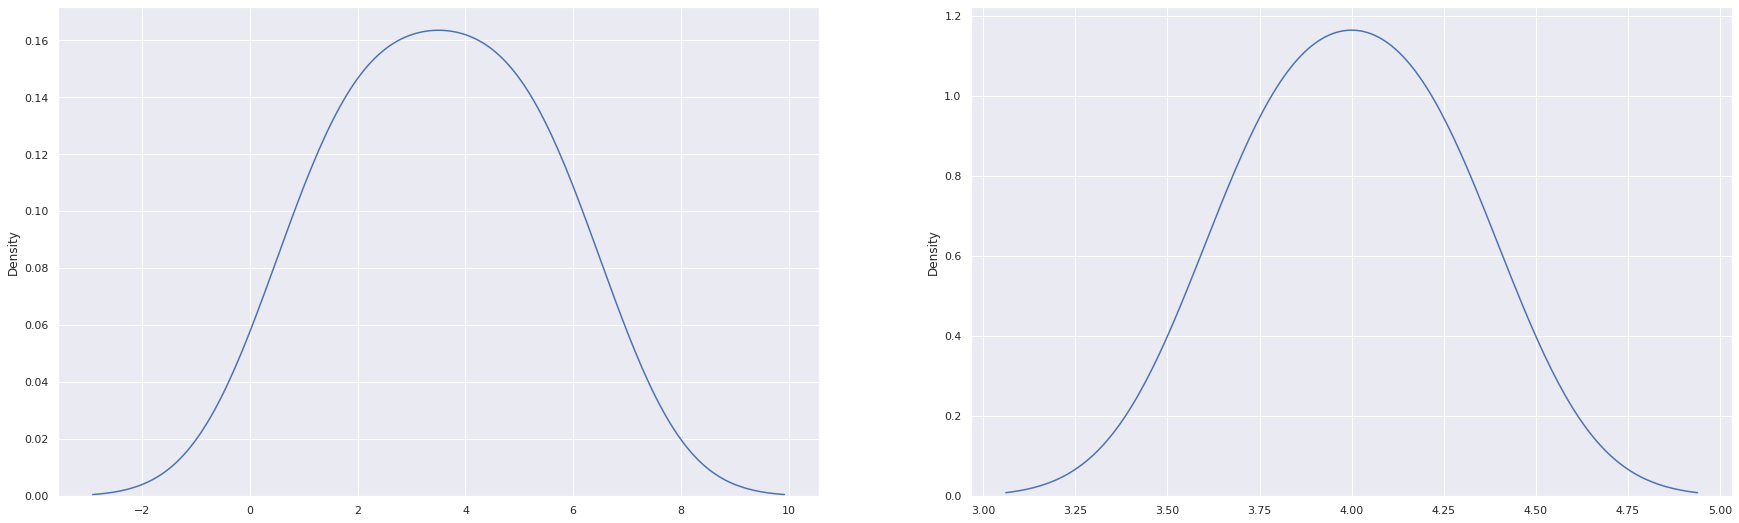

In [ ]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(30, 9)

sns.kdeplot(pop, ax=axs[0])
sns.kdeplot(a_mean, ax=axs[1])

In [ ]:
a_mean

array([2.9, 4.6])

#Chi Square Distribution

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use( 'dark_background')

import seaborn as sns
sns.set_theme(color_codes=True)

In [ ]:
dice = np.array([1,2,3,4,5,6])

In [ ]:
s = np.random.choice(dice, 3)

In [ ]:
sam = np.array([])
np.random.seed(12)
for i in range(10**5):
    s = np.random.choice(dice, 3)
    s_var  = np.var(s)
    sam = np.append(sam, s_var)
np.var(sam)

2.175859528612346

In [ ]:
np.var(dice)

2.9166666666666665

In [ ]:
np.random.randn(3)


array([-1.09046773,  0.5471539 , -1.20809057])

In [ ]:
#continuous distribution exercise

sam = np.array([])
for i in range(10**5):
    s = np.random.randn(50)
    s_var  = np.var(s)
    sam = np.append(sam, s_var)
np.mean(sam)

0.9801087166264972

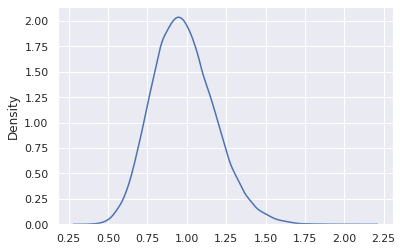

In [ ]:
sns.kdeplot(sam)

EXERCISE ON CHI SQR DIST 


let $Z_1 , Z_2,..., Z_n$ be independent Standard Normal Variables
and $Q = \Sigma_i^N   Z_i^2$

plot for n = 1,2,3,4,5...

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


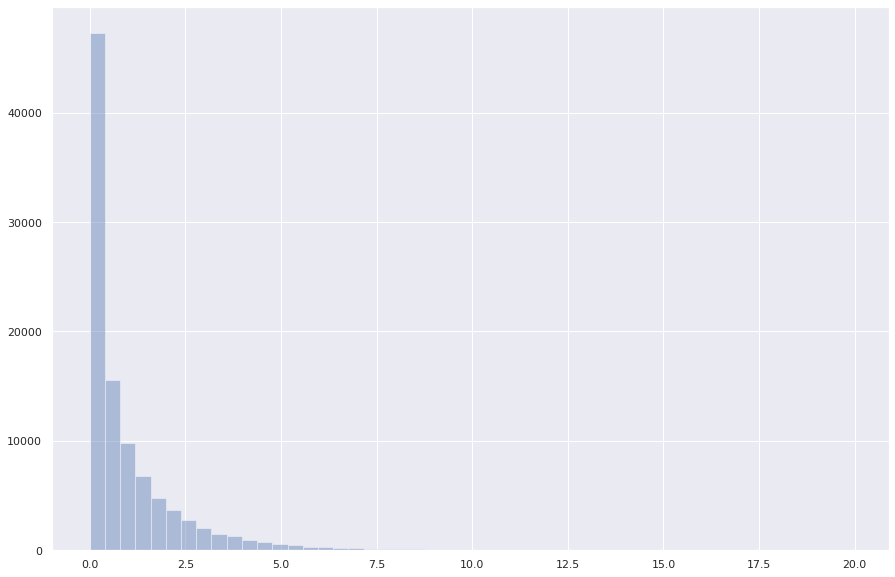

In [ ]:
z1 = np.random.randn(100000)
q = z1**2
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(q, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


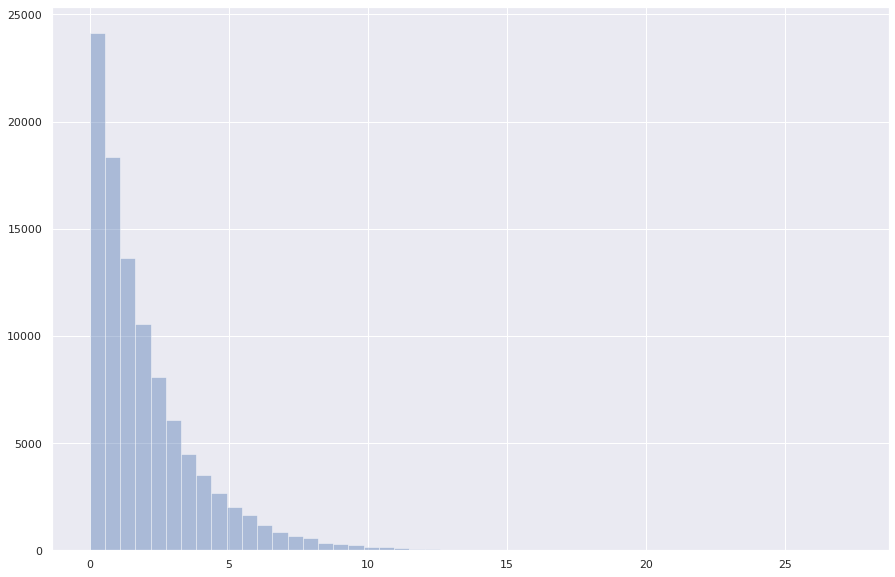

In [ ]:
z1 = np.random.randn(100000)
z2 = np.random.randn(100000)

q = z1**2 + z2**2
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(q, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


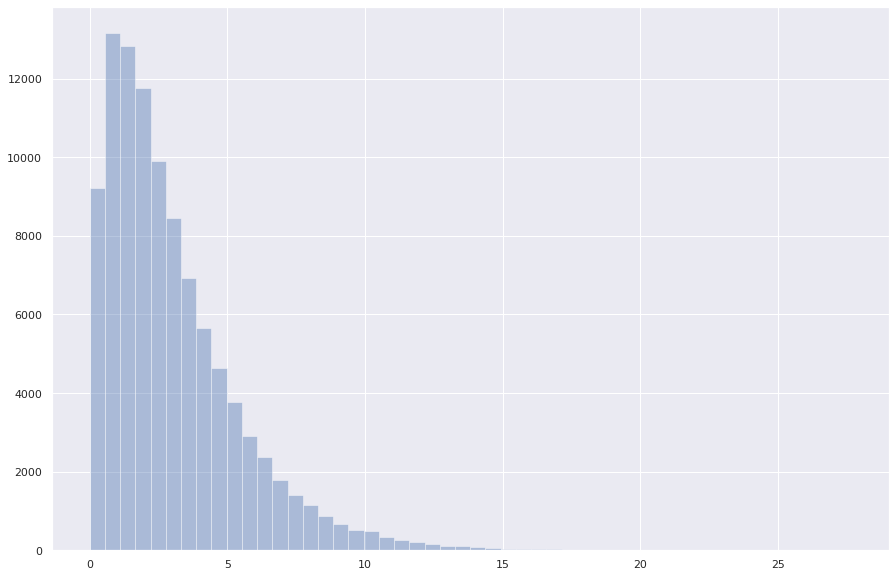

In [ ]:
z1 = np.random.randn(100000)
z2 = np.random.randn(100000)
z3 = np.random.randn(100000)

q = z1**2 + z2**2 + z3**2
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(q, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


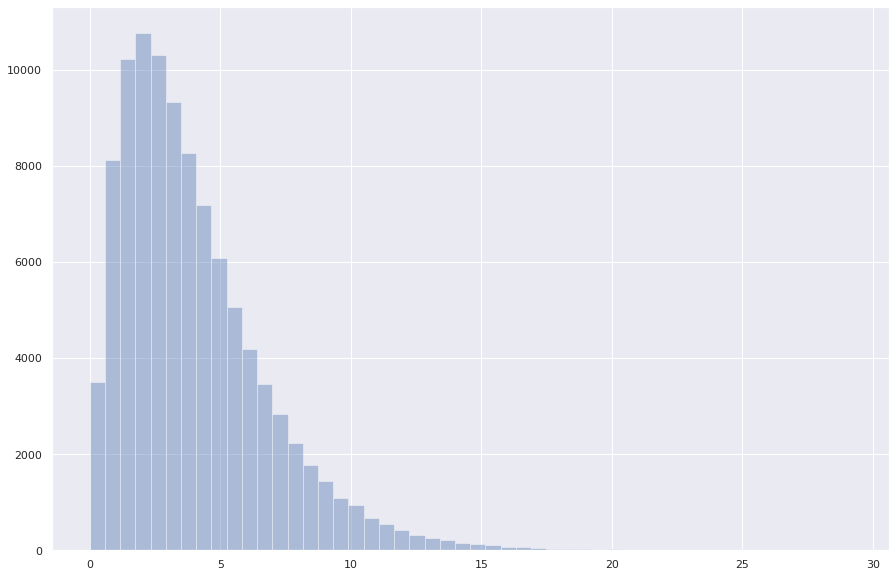

In [ ]:
z1 = np.random.randn(100000)
z2 = np.random.randn(100000)
z3 = np.random.randn(100000)
z4 = np.random.randn(100000)

np.random.seed(52)

q = z1**2 + z2**2 + z3**2 + z4**2
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(q, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


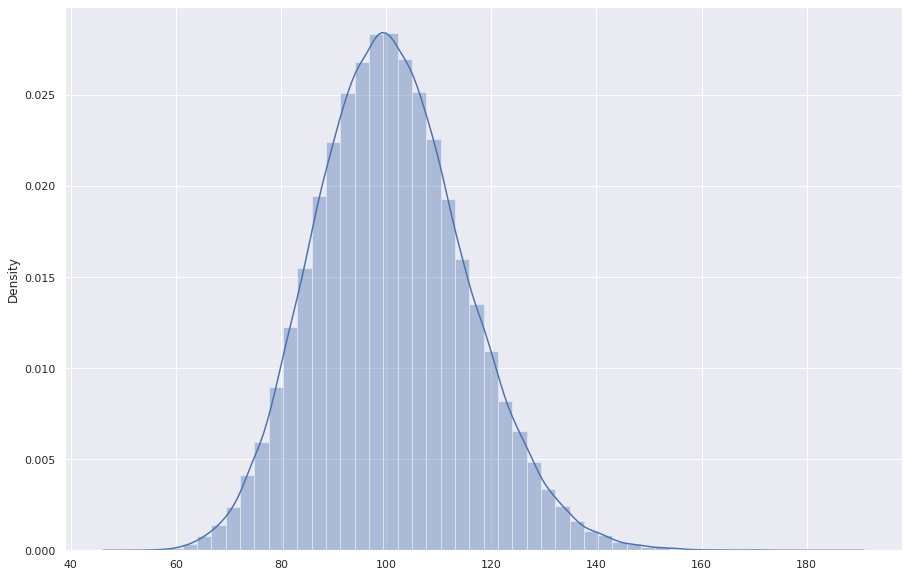

In [ ]:
q = np.array([])
np.random.seed(52)
q = np.array([(np.random.randn(100000))**2])
for i in range(100):
    z = np.random.randn(100000)
    q = q+z**2

fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(q, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


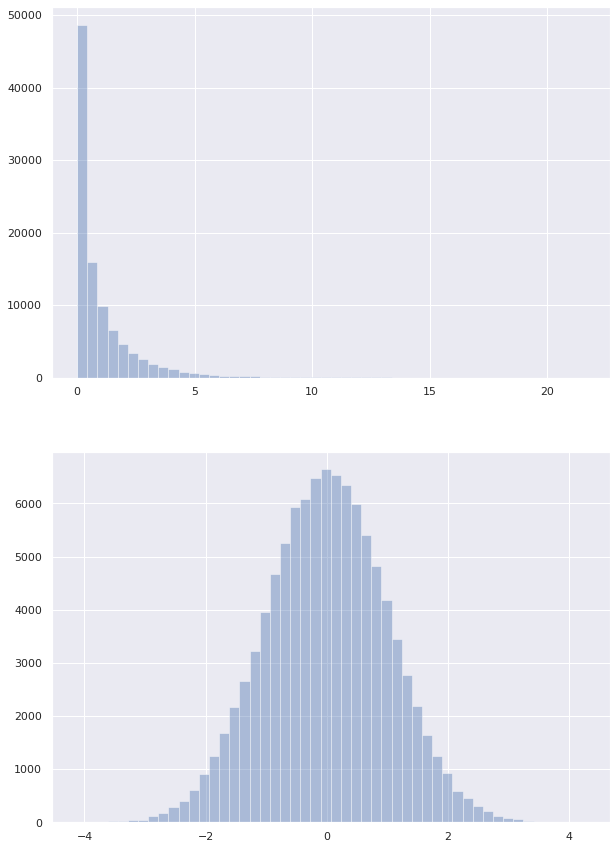

In [ ]:
z1 = np.random.randn(100000)
q = z1**2
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(10,15)

sns.distplot(q, kde=False, ax = axs[0])
sns.distplot(z, kde=False, ax = axs[1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


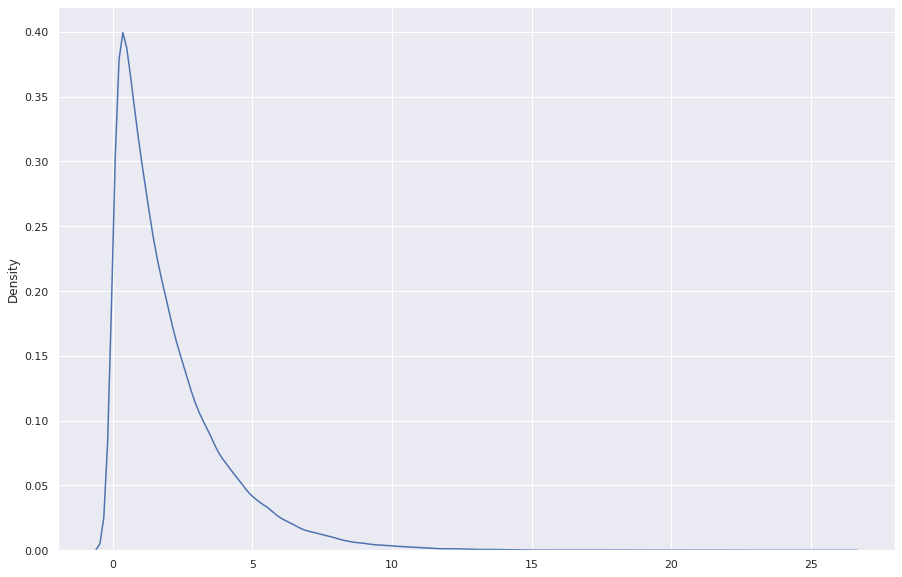

In [ ]:
z1 = np.random.randn(100000)
z2 = np.random.randn(100000)

q = z1**2 + z2**2
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.distplot(q, norm_hist = True, hist=False)

In [ ]:
q = np.array([])
np.random.seed(52)
q = np.array([(np.random.randn(100000))**2])
for i in range(3):
    z = np.random.randn(100000)
    q = q+z**2

fig = plt.gcf()
fig.set_size_inches(15,10)
sns.displot(q,hue_norm=(0,1) )

#CLT - REVISION

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.set_theme(color_codes=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

24.72458969705458
24.976509274266906


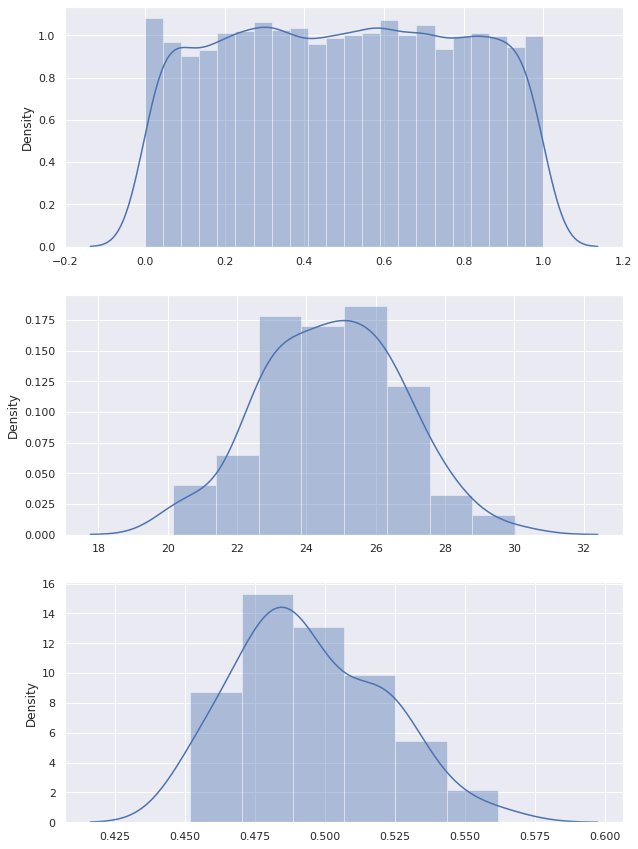

In [ ]:
x = np.random.uniform(0,1, 10000)
rv = np.zeros(100)
mean = np.array([])
for i in range(50):
    #n of clt
    a = np.random.choice(x, 100)
    #this is size of sample
    rv = rv+a
    mean = np.append(mean, np.mean(a))

fig, axis = plt.subplots(nrows=3)
fig.set_size_inches(10,15)
sns.distplot(x, norm_hist=True, ax=axis[0])
sns.distplot(rv, norm_hist=True, ax=axis[1])
sns.distplot(mean, norm_hist=True, ax=axis[2])

print(np.mean(rv))
print(50*np.mean(x))

#ESTIMATORS

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

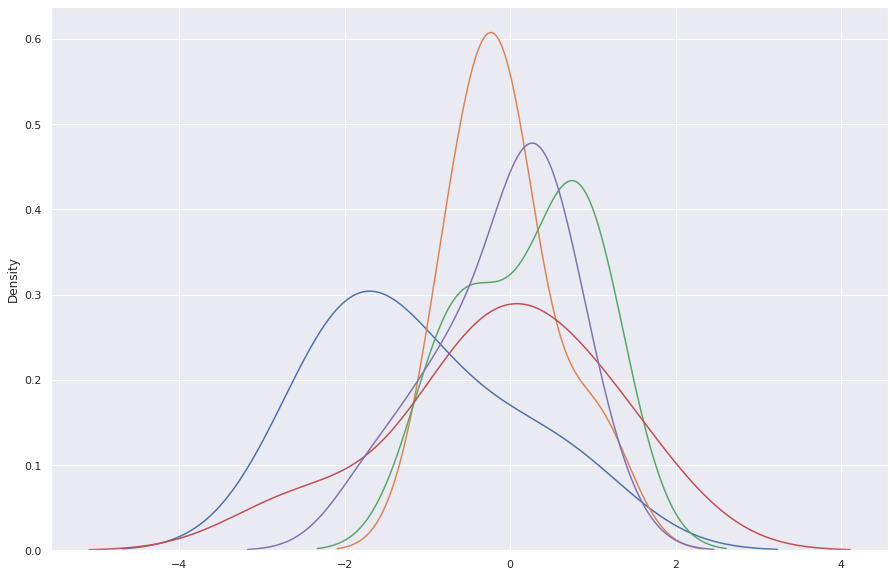

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
for i in range(5,10):
    nd = np.random.randn(2000)
    x = np.random.choice(nd, i)
    x_m = np.mean(x)
    sns.distplot(x, norm_hist=True, kde=True, hist=False)

#T-DISTRIBUTION


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

In [ ]:
t_values = np.array([])
for i in range(10000):
    x = np.random.normal(35, 2.6, 50 )
    t = [(50)**(1/2) * ((np.mean(x)) - 35)]/np.var(x)
    t_values = np.append(t_values, t)

t_values

array([-0.97283094,  0.0682619 , -0.16166458, ..., -0.02836636,
        0.35083065, -0.05683994])

(-5.0, 5.0)

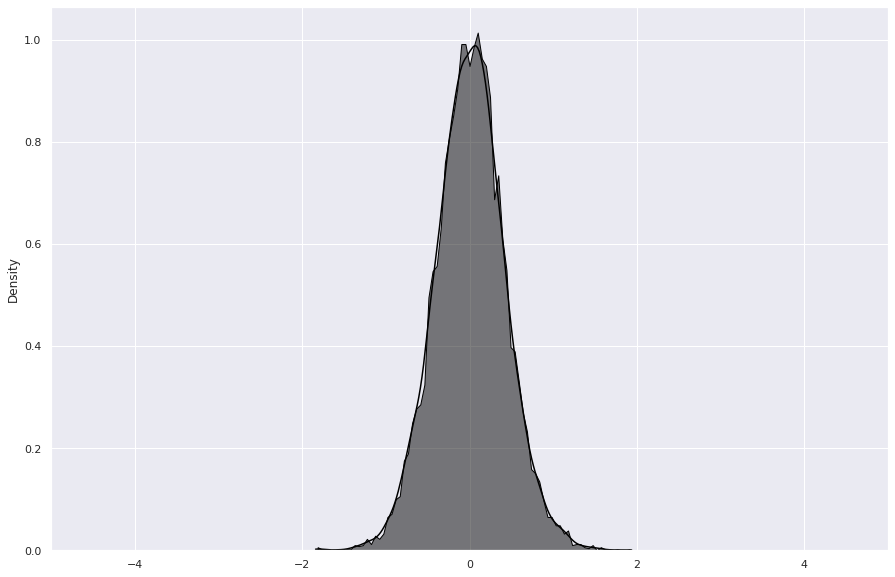

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.histplot(t_values, stat='density', kde=True, element="poly", color='black')
plt.xlim([-5,5])

In [ ]:
t_values.shape

(100000,)

In [ ]:
np.var(x)

8.65996195919779

#HYPOTHESIS TESTING


##DATA

In [ ]:
chip_weights = [193, 212, 174, 200, 195, 195, 194, 198, 181, 203]
ball_bearing_radius = [2.99, 2.99, 2.70, 2.92, 2.88, 2.92, 2.82, 2.83, 3.06, 2.85]
user_ratings = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
mileage = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]


##Z TEST

###TWO TAILED TEST

In [ ]:
import numpy as np
from math import sqrt
from scipy.stats import norm

# h1 : u != U_0
# h0 : u = u_0
#case study : ball bearing example, claim is that radius = 3, do hypothesis testing 
mu_0 = 3
sigma = 0.1

#collect sample
sample = ball_bearing_radius

#compute mean
mean = np.mean(sample)

#compute n
n = len(sample)

#compute test statistic
z = (mean - mu_0) /(sigma/sqrt(n))

#set alpha
a = 0.01

#-------------------------

#calculate the z_a/2, by using percent point function of the norm of scipy
#ppf = percent point function, inverse of CDF(comulative distribution function)
#also, CDF = pr(X<=x), i.e., probability to the left of the distribution

z_critical = norm.ppf(1-a/2)    #this returns a value for which the probab to the left is 0.975

p_value = 2*(1 - norm.cdf(np.abs(z))) #this gives us the probability

p_value = float("{:.4f}".format(p_value))


print('z : ',z)
print('\nz_critical :', z_critical)
print('\nmean :', mean, "\n\n")

#test the hypothesis

if (np.abs(z) > z_critical):
    print("\nREJECT THE NULL HYPOTHESIS : \n p-value = ", p_value, "\n Alpha = ", a )

else:
    print("CANNOT REJECT THE NULL HYPOTHESIS. NOT ENOUGH EVIDENCE TO REJECT IT: \n p-value = ", p_value, "\n Alpha = ", a )


z :  -3.2887687665751177

z_critical : 2.5758293035489004

mean : 2.896 



REJECT THE NULL HYPOTHESIS : 
 p-value =  0.001 
 Alpha =  0.01


In [ ]:
import numpy as np
from math import sqrt
from scipy.stats import norm

# h1 : u != U_0
# h0 : u = u_0
#case study : chips example, claim is that weight is 200gm, do hypothesis testing 
mu_0 = 200
sigma = 10

#collect sample
sample = chip_weights

#compute mean
mean = np.mean(sample)

#compute n
n = len(sample)

#compute test statistic
z = (mean - mu_0) /(sigma/sqrt(n))

#set alpha
a = 0.05

#-------------------------

#calculate the z_a/2, by using percent point function of the norm of scipy
#ppf = percent point function, inverse of CDF(comulative distribution function)
#also, CDF = pr(X<=x), i.e., probability to the left of the distribution

z_critical = norm.ppf(1-a/2)    #this returns a value for which the probab to the left is 0.975

p_value = 2*(1 - norm.cdf(np.abs(z))) #this gives us the probability

p_value = float(p_value)


print('z : ',z)
print('\nz_critical :', z_critical)
print('\nmean :', mean, "\n\n")

#test the hypothesis

if (np.abs(z) > z_critical):
    print("\nREJECT THE NULL HYPOTHESIS : \n p-value = ", p_value, "\n Alpha = ", a )

else:
    print("CANNOT REJECT THE NULL HYPOTHESIS. NOT ENOUGH EVIDENCE TO REJECT IT: \n p-value = ", p_value, "\n Alpha = ", a )


z :  -1.7392527130926088

z_critical : 1.959963984540054

mean : 194.5 


CANNOT REJECT THE NULL HYPOTHESIS. NOT ENOUGH EVIDENCE TO REJECT IT: 
 p-value =  0.08199032100038295 
 Alpha =  0.05


###ONE-TAILED TEST

In [ ]:
import numpy as np
from math import sqrt
from scipy.stats import norm

# h1 : u > u_0
# h0 : u <= u_0
#case study : dialog system example, claim is that avg rating >4, do hypothesis testing 
mu_0 = 4
sigma = 0.5

#collect sample
sample = user_ratings

#compute mean
mean = np.mean(sample)

#compute n
n = len(sample)

#compute test statistic
z = (mean - mu_0) /(sigma/sqrt(n))

#set alpha
a = 0.05

#-------------------------

#calculate the z_a/2, by using percent point function of the norm of scipy
#ppf = percent point function, inverse of CDF(comulative distribution function)
#also, CDF = pr(X<=x), i.e., probability to the left of the distribution

z_critical = norm.ppf(1-a)    #this returns a value for which the probab to the left is 0.975

p_value = (1 - norm.cdf(np.abs(z))) #this gives us the probability

p_value = float("{:.4f}".format(p_value))


print('z : ',z)
print('\nz_critical :', z_critical)
print('\nmean :', mean, "\n\n")

#test the hypothesis

if (np.abs(z) > z_critical):
    print("\nREJECT THE NULL HYPOTHESIS : \n p-value = ", p_value, "\n Alpha = ", a )

else:
    print("CANNOT REJECT THE NULL HYPOTHESIS. NOT ENOUGH EVIDENCE TO REJECT IT: \n p-value = ", p_value, "\n Alpha = ", a )


z :  2.23606797749979

z_critical : 1.6448536269514722

mean : 4.25 



REJECT THE NULL HYPOTHESIS : 
 p-value =  0.0127 
 Alpha =  0.05


##T-TEST

#random programming


In [ ]:
import pandas as pd

df = pd.read_clipboard()

PyperclipException: ignored

NameError: ignored